ZADANIE 1

In [ ]:
import statistics

import scrapy

from Jezyki_Skryptowe_w_analizie_danych.gadzety.analyze import cheapest_price, most_expensive_price


class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        for q in response.css('div.quote'):
            text = q.css('span.text::text').get()
            author = q.css('small.author::text').get()
            tags = q.css('div.tags a.tag::text').getall()

            yield {
                'text': text,
                'author': author,
                'tags': tags
            }
        next_page = response.css('li.next a::attr(href)').get()
        if next_page:
            yield response.follow(next_page, callback=self.parse)

OUTPUT ZADANIE1

In [ ]:
[
{"text": "\u201cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\u201d", "author": "Albert Einstein", "tags": ["change", "deep-thoughts", "thinking", "world"]},
{"text": "\u201cIt is our choices, Harry, that show what we truly are, far more than our abilities.\u201d", "author": "J.K. Rowling", "tags": ["abilities", "choices"]},
{"text": "\u201cThere are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.\u201d", "author": "Albert Einstein", "tags": ["inspirational", "life", "live", "miracle", "miracles"]},
{"text": "\u201cThe person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.\u201d", "author": "Jane Austen", "tags": ["aliteracy", "books", "classic", "humor"]},
{"text": "\u201cImperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.\u201d", "author": "Marilyn Monroe", "tags": ["be-yourself", "inspirational"]},
{"text": "\u201cTry not to become a man of success. Rather become a man of value.\u201d", "author": "Albert Einstein", "tags": ["adulthood", "success", "value"]},
{"text": "\u201cIt is better to be hated for what you are than to be loved for what you are not.\u201d", "author": "Andr\u00e9 Gide", "tags": ["life", "love"]},
{"text": "\u201cI have not failed. I've just found 10,000 ways that won't work.\u201d", "author": "Thomas A. Edison", "tags": ["edison", "failure", "inspirational", "paraphrased"]},
{"text": "\u201cA woman is like a tea bag; you never know how strong it is until it's in hot water.\u201d", "author": "Eleanor Roosevelt", "tags": ["misattributed-eleanor-roosevelt"]},
{"text": "\u201cA day without sunshine is like, you know, night.\u201d", "author": "Steve Martin", "tags": ["humor", "obvious", "simile"]},
{"text": "\u201cThis life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.\u201d", "author": "Marilyn Monroe", "tags": ["friends", "heartbreak", "inspirational", "life", "love", "sisters"]},
{"text": "\u201cIt takes a great deal of bravery to stand up to our enemies, but just as much to stand up to our friends.\u201d", "author": "J.K. Rowling", "tags": ["courage", "friends"]},
{"text": "\u201cIf you can't explain it to a six year old, you don't understand it yourself.\u201d", "author": "Albert Einstein", "tags": ["simplicity", "understand"]},
{"text": "\u201cYou may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect\u2014you aren't either, and the two of you may never be perfect together but if she can make you laugh, cause you to think twice, and admit to being human and making mistakes, hold onto her and give her the most you can. She may not be thinking about you every second of the day, but she will give you a part of her that she knows you can break\u2014her heart. So don't hurt her, don't change her, don't analyze and don't expect more than she can give. Smile when she makes you happy, let her know when she makes you mad, and miss her when she's not there.\u201d", "author": "Bob Marley", "tags": ["love"]},
{"text": "\u201cI like nonsense, it wakes up the brain cells. Fantasy is a necessary ingredient in living.\u201d", "author": "Dr. Seuss", "tags": ["fantasy"]},
{"text": "\u201cI may not have gone where I intended to go, but I think I have ended up where I needed to be.\u201d", "author": "Douglas Adams", "tags": ["life", "navigation"]},
{"text": "\u201cThe opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.\u201d", "author": "Elie Wiesel", "tags": ["activism", "apathy", "hate", "indifference", "inspirational", "love", "opposite", "philosophy"]},
{"text": "\u201cIt is not a lack of love, but a lack of friendship that makes unhappy marriages.\u201d", "author": "Friedrich Nietzsche", "tags": ["friendship", "lack-of-friendship", "lack-of-love", "love", "marriage", "unhappy-marriage"]},
{"text": "\u201cGood friends, good books, and a sleepy conscience: this is the ideal life.\u201d", "author": "Mark Twain", "tags": ["books", "contentment", "friends", "friendship", "life"]},
{"text": "\u201cLife is what happens to us while we are making other plans.\u201d", "author": "Allen Saunders", "tags": ["fate", "life", "misattributed-john-lennon", "planning", "plans"]},
{"text": "\u201cI love you without knowing how, or when, or from where. I love you simply, without problems or pride: I love you in this way because I do not know any other way of loving but this, in which there is no I or you, so intimate that your hand upon my chest is my hand, so intimate that when I fall asleep your eyes close.\u201d", "author": "Pablo Neruda", "tags": ["love", "poetry"]},
{"text": "\u201cFor every minute you are angry you lose sixty seconds of happiness.\u201d", "author": "Ralph Waldo Emerson", "tags": ["happiness"]},
{"text": "\u201cIf you judge people, you have no time to love them.\u201d", "author": "Mother Teresa", "tags": ["attributed-no-source"]},
{"text": "\u201cAnyone who thinks sitting in church can make you a Christian must also think that sitting in a garage can make you a car.\u201d", "author": "Garrison Keillor", "tags": ["humor", "religion"]},
{"text": "\u201cBeauty is in the eye of the beholder and it may be necessary from time to time to give a stupid or misinformed beholder a black eye.\u201d", "author": "Jim Henson", "tags": ["humor"]},
{"text": "\u201cToday you are You, that is truer than true. There is no one alive who is Youer than You.\u201d", "author": "Dr. Seuss", "tags": ["comedy", "life", "yourself"]},
{"text": "\u201cIf you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.\u201d", "author": "Albert Einstein", "tags": ["children", "fairy-tales"]},
{"text": "\u201cIt is impossible to live without failing at something, unless you live so cautiously that you might as well not have lived at all - in which case, you fail by default.\u201d", "author": "J.K. Rowling", "tags": []},
{"text": "\u201cLogic will get you from A to Z; imagination will get you everywhere.\u201d", "author": "Albert Einstein", "tags": ["imagination"]},
{"text": "\u201cOne good thing about music, when it hits you, you feel no pain.\u201d", "author": "Bob Marley", "tags": ["music"]},
{"text": "\u201cThe more that you read, the more things you will know. The more that you learn, the more places you'll go.\u201d", "author": "Dr. Seuss", "tags": ["learning", "reading", "seuss"]},
{"text": "\u201cOf course it is happening inside your head, Harry, but why on earth should that mean that it is not real?\u201d", "author": "J.K. Rowling", "tags": ["dumbledore"]},
{"text": "\u201cThe truth is, everyone is going to hurt you. You just got to find the ones worth suffering for.\u201d", "author": "Bob Marley", "tags": ["friendship"]},
{"text": "\u201cNot all of us can do great things. But we can do small things with great love.\u201d", "author": "Mother Teresa", "tags": ["misattributed-to-mother-teresa", "paraphrased"]},
{"text": "\u201cTo the well-organized mind, death is but the next great adventure.\u201d", "author": "J.K. Rowling", "tags": ["death", "inspirational"]},
{"text": "\u201cAll you need is love. But a little chocolate now and then doesn't hurt.\u201d", "author": "Charles M. Schulz", "tags": ["chocolate", "food", "humor"]},
{"text": "\u201cWe read to know we're not alone.\u201d", "author": "William Nicholson", "tags": ["misattributed-to-c-s-lewis", "reading"]},
{"text": "\u201cAny fool can know. The point is to understand.\u201d", "author": "Albert Einstein", "tags": ["knowledge", "learning", "understanding", "wisdom"]},
{"text": "\u201cI have always imagined that Paradise will be a kind of library.\u201d", "author": "Jorge Luis Borges", "tags": ["books", "library"]},
{"text": "\u201cIt is never too late to be what you might have been.\u201d", "author": "George Eliot", "tags": ["inspirational"]},
{"text": "\u201cA reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.\u201d", "author": "George R.R. Martin", "tags": ["read", "readers", "reading", "reading-books"]},
{"text": "\u201cYou can never get a cup of tea large enough or a book long enough to suit me.\u201d", "author": "C.S. Lewis", "tags": ["books", "inspirational", "reading", "tea"]},
{"text": "\u201cYou believe lies so you eventually learn to trust no one but yourself.\u201d", "author": "Marilyn Monroe", "tags": []},
{"text": "\u201cIf you can make a woman laugh, you can make her do anything.\u201d", "author": "Marilyn Monroe", "tags": ["girls", "love"]},
{"text": "\u201cLife is like riding a bicycle. To keep your balance, you must keep moving.\u201d", "author": "Albert Einstein", "tags": ["life", "simile"]},
{"text": "\u201cThe real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.\u201d", "author": "Marilyn Monroe", "tags": ["love"]},
{"text": "\u201cA wise girl kisses but doesn't love, listens but doesn't believe, and leaves before she is left.\u201d", "author": "Marilyn Monroe", "tags": ["attributed-no-source"]},
{"text": "\u201cOnly in the darkness can you see the stars.\u201d", "author": "Martin Luther King Jr.", "tags": ["hope", "inspirational"]},
{"text": "\u201cIt matters not what someone is born, but what they grow to be.\u201d", "author": "J.K. Rowling", "tags": ["dumbledore"]},
{"text": "\u201cLove does not begin and end the way we seem to think it does. Love is a battle, love is a war; love is a growing up.\u201d", "author": "James Baldwin", "tags": ["love"]},
{"text": "\u201cThere is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature.\u201d", "author": "Jane Austen", "tags": ["friendship", "love"]},
{"text": "\u201cDo one thing every day that scares you.\u201d", "author": "Eleanor Roosevelt", "tags": ["attributed", "fear", "inspiration"]},
{"text": "\u201cI am good, but not an angel. I do sin, but I am not the devil. I am just a small girl in a big world trying to find someone to love.\u201d", "author": "Marilyn Monroe", "tags": ["attributed-no-source"]},
{"text": "\u201cIf I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.\u201d", "author": "Albert Einstein", "tags": ["music"]},
{"text": "\u201cIf you only read the books that everyone else is reading, you can only think what everyone else is thinking.\u201d", "author": "Haruki Murakami", "tags": ["books", "thought"]},
{"text": "\u201cThe difference between genius and stupidity is: genius has its limits.\u201d", "author": "Alexandre Dumas fils", "tags": ["misattributed-to-einstein"]},
{"text": "\u201cHe's like a drug for you, Bella.\u201d", "author": "Stephenie Meyer", "tags": ["drug", "romance", "simile"]},
{"text": "\u201cThere is no friend as loyal as a book.\u201d", "author": "Ernest Hemingway", "tags": ["books", "friends", "novelist-quotes"]},
{"text": "\u201cWhen one door of happiness closes, another opens; but often we look so long at the closed door that we do not see the one which has been opened for us.\u201d", "author": "Helen Keller", "tags": ["inspirational"]},
{"text": "\u201cLife isn't about finding yourself. Life is about creating yourself.\u201d", "author": "George Bernard Shaw", "tags": ["inspirational", "life", "yourself"]},
{"text": "\u201cThat's the problem with drinking, I thought, as I poured myself a drink. If something bad happens you drink in an attempt to forget; if something good happens you drink in order to celebrate; and if nothing happens you drink to make something happen.\u201d", "author": "Charles Bukowski", "tags": ["alcohol"]},
{"text": "\u201cYou don\u2019t forget the face of the person who was your last hope.\u201d", "author": "Suzanne Collins", "tags": ["the-hunger-games"]},
{"text": "\u201cRemember, we're madly in love, so it's all right to kiss me anytime you feel like it.\u201d", "author": "Suzanne Collins", "tags": ["humor"]},
{"text": "\u201cTo love at all is to be vulnerable. Love anything and your heart will be wrung and possibly broken. If you want to make sure of keeping it intact you must give it to no one, not even an animal. Wrap it carefully round with hobbies and little luxuries; avoid all entanglements. Lock it up safe in the casket or coffin of your selfishness. But in that casket, safe, dark, motionless, airless, it will change. It will not be broken; it will become unbreakable, impenetrable, irredeemable. To love is to be vulnerable.\u201d", "author": "C.S. Lewis", "tags": ["love"]},
{"text": "\u201cNot all those who wander are lost.\u201d", "author": "J.R.R. Tolkien", "tags": ["bilbo", "journey", "lost", "quest", "travel", "wander"]},
{"text": "\u201cDo not pity the dead, Harry. Pity the living, and, above all those who live without love.\u201d", "author": "J.K. Rowling", "tags": ["live-death-love"]},
{"text": "\u201cThere is nothing to writing. All you do is sit down at a typewriter and bleed.\u201d", "author": "Ernest Hemingway", "tags": ["good", "writing"]},
{"text": "\u201cFinish each day and be done with it. You have done what you could. Some blunders and absurdities no doubt crept in; forget them as soon as you can. Tomorrow is a new day. You shall begin it serenely and with too high a spirit to be encumbered with your old nonsense.\u201d", "author": "Ralph Waldo Emerson", "tags": ["life", "regrets"]},
{"text": "\u201cI have never let my schooling interfere with my education.\u201d", "author": "Mark Twain", "tags": ["education"]},
{"text": "\u201cI have heard there are troubles of more than one kind. Some come from ahead and some come from behind. But I've bought a big bat. I'm all ready you see. Now my troubles are going to have troubles with me!\u201d", "author": "Dr. Seuss", "tags": ["troubles"]},
{"text": "\u201cIf I had a flower for every time I thought of you...I could walk through my garden forever.\u201d", "author": "Alfred Tennyson", "tags": ["friendship", "love"]},
{"text": "\u201cSome people never go crazy. What truly horrible lives they must lead.\u201d", "author": "Charles Bukowski", "tags": ["humor"]},
{"text": "\u201cThe trouble with having an open mind, of course, is that people will insist on coming along and trying to put things in it.\u201d", "author": "Terry Pratchett", "tags": ["humor", "open-mind", "thinking"]},
{"text": "\u201cThink left and think right and think low and think high. Oh, the thinks you can think up if only you try!\u201d", "author": "Dr. Seuss", "tags": ["humor", "philosophy"]},
{"text": "\u201cWhat really knocks me out is a book that, when you're all done reading it, you wish the author that wrote it was a terrific friend of yours and you could call him up on the phone whenever you felt like it. That doesn't happen much, though.\u201d", "author": "J.D. Salinger", "tags": ["authors", "books", "literature", "reading", "writing"]},
{"text": "\u201cThe reason I talk to myself is because I\u2019m the only one whose answers I accept.\u201d", "author": "George Carlin", "tags": ["humor", "insanity", "lies", "lying", "self-indulgence", "truth"]},
{"text": "\u201cYou may say I'm a dreamer, but I'm not the only one. I hope someday you'll join us. And the world will live as one.\u201d", "author": "John Lennon", "tags": ["beatles", "connection", "dreamers", "dreaming", "dreams", "hope", "inspirational", "peace"]},
{"text": "\u201cI am free of all prejudice. I hate everyone equally. \u201d", "author": "W.C. Fields", "tags": ["humor", "sinister"]},
{"text": "\u201cThe question isn't who is going to let me; it's who is going to stop me.\u201d", "author": "Ayn Rand", "tags": []},
{"text": "\u201c\u2032Classic\u2032 - a book which people praise and don't read.\u201d", "author": "Mark Twain", "tags": ["books", "classic", "reading"]},
{"text": "\u201cAnyone who has never made a mistake has never tried anything new.\u201d", "author": "Albert Einstein", "tags": ["mistakes"]},
{"text": "\u201cA lady's imagination is very rapid; it jumps from admiration to love, from love to matrimony in a moment.\u201d", "author": "Jane Austen", "tags": ["humor", "love", "romantic", "women"]},
{"text": "\u201cRemember, if the time should come when you have to make a choice between what is right and what is easy, remember what happened to a boy who was good, and kind, and brave, because he strayed across the path of Lord Voldemort. Remember Cedric Diggory.\u201d", "author": "J.K. Rowling", "tags": ["integrity"]},
{"text": "\u201cI declare after all there is no enjoyment like reading! How much sooner one tires of any thing than of a book! -- When I have a house of my own, I shall be miserable if I have not an excellent library.\u201d", "author": "Jane Austen", "tags": ["books", "library", "reading"]},
{"text": "\u201cThere are few people whom I really love, and still fewer of whom I think well. The more I see of the world, the more am I dissatisfied with it; and every day confirms my belief of the inconsistency of all human characters, and of the little dependence that can be placed on the appearance of merit or sense.\u201d", "author": "Jane Austen", "tags": ["elizabeth-bennet", "jane-austen"]},
{"text": "\u201cSome day you will be old enough to start reading fairy tales again.\u201d", "author": "C.S. Lewis", "tags": ["age", "fairytales", "growing-up"]},
{"text": "\u201cWe are not necessarily doubting that God will do the best for us; we are wondering how painful the best will turn out to be.\u201d", "author": "C.S. Lewis", "tags": ["god"]},
{"text": "\u201cThe fear of death follows from the fear of life. A man who lives fully is prepared to die at any time.\u201d", "author": "Mark Twain", "tags": ["death", "life"]},
{"text": "\u201cA lie can travel half way around the world while the truth is putting on its shoes.\u201d", "author": "Mark Twain", "tags": ["misattributed-mark-twain", "truth"]},
{"text": "\u201cI believe in Christianity as I believe that the sun has risen: not only because I see it, but because by it I see everything else.\u201d", "author": "C.S. Lewis", "tags": ["christianity", "faith", "religion", "sun"]},
{"text": "\u201cThe truth.\" Dumbledore sighed. \"It is a beautiful and terrible thing, and should therefore be treated with great caution.\u201d", "author": "J.K. Rowling", "tags": ["truth"]},
{"text": "\u201cI'm the one that's got to die when it's time for me to die, so let me live my life the way I want to.\u201d", "author": "Jimi Hendrix", "tags": ["death", "life"]},
{"text": "\u201cTo die will be an awfully big adventure.\u201d", "author": "J.M. Barrie", "tags": ["adventure", "love"]},
{"text": "\u201cIt takes courage to grow up and become who you really are.\u201d", "author": "E.E. Cummings", "tags": ["courage"]},
{"text": "\u201cBut better to get hurt by the truth than comforted with a lie.\u201d", "author": "Khaled Hosseini", "tags": ["life"]},
{"text": "\u201cYou never really understand a person until you consider things from his point of view... Until you climb inside of his skin and walk around in it.\u201d", "author": "Harper Lee", "tags": ["better-life-empathy"]},
{"text": "\u201cYou have to write the book that wants to be written. And if the book will be too difficult for grown-ups, then you write it for children.\u201d", "author": "Madeleine L'Engle", "tags": ["books", "children", "difficult", "grown-ups", "write", "writers", "writing"]},
{"text": "\u201cNever tell the truth to people who are not worthy of it.\u201d", "author": "Mark Twain", "tags": ["truth"]},
{"text": "\u201cA person's a person, no matter how small.\u201d", "author": "Dr. Seuss", "tags": ["inspirational"]},
{"text": "\u201c... a mind needs books as a sword needs a whetstone, if it is to keep its edge.\u201d", "author": "George R.R. Martin", "tags": ["books", "mind"]}
]

ZADANIE2

In [ ]:
import scrapy

class PurseSpider(scrapy.Spider):
    name = 'purse'
    start_urls = ['https://ccc.eu/pl/torby/torby-damskie']

    def parse(self, response):
        for purse in response.css('div.c-offerBox_row'):
            name = purse.css('div.c-offerBox_data a span::text').get()
            price_zl = purse.css('span.a-price_price::text').get()
            price_gr = purse.css('span.a-price_meta span.a-price_rest::text').get()

            price = f"{price_zl}.{price_gr}".strip()

            yield {
                'name': name if name else None,
                'price': price
            }

            next_page = response.css('a.is-nextLink::attr(href)').get()
            if next_page:
                yield response.follow(next_page, callback=self.parse)


OUTPUT ZADANIE 2

In [ ]:
[
{"name": "Torebka NINE WEST CEO-LINDA-LA374-4064 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka EVA MINGE EO-ALLIE-LDA8224 Czarny", "price": "399.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-007-08 Bordowy", "price": "229.99"},
{"name": "Torebka Gino Rossi SANTANA-CS8625 Be\u017cowy", "price": "229.99"},
{"name": null, "price": "319.99"},
{"name": "Torebka NINE WEST CEO-ARIA-S24414 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-L-007-08 Bordowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ZOE-S23806 Czarny", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-ZOE-S23806 Czarny", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-MONTANA-LDA7800A Be\u017cowy", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-I-LDA8006 Be\u017cowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MONTANA-LDA7800A Bordowy", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-MONTANA-LDA7800A Czarny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-I-LDA8006 Czarny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-L-013-08 MIX", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-020-08 Camel", "price": "219.99"},
{"name": "Torebka Mexx C-MEXX-L-020-08 Zielony", "price": "219.99"},
{"name": "Torebka Jenny C-MJT-J-004-02 Czarny", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-020-08 Czarny", "price": "219.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-I-LDA8176 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST EO-WYOMING-LDA8449 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST EO-KENTUCKY-LDA8168 Br\u0105zowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-I-LDA8176 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST EO- VERMONT-III-LDA8407 Czarny", "price": "399.99"},
{"name": "Torebka NINE WEST EO-KENTUCKY-LDA8168 Czarny", "price": "369.99"},
{"name": "Torebka Lasocki C-LSK-K-062-06 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-K-062-06 Camel", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-K-064-06 Camel", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-K-066-06 Czarny", "price": "199.99"},
{"name": "Torebka Lasocki C-MLR-J-022-05 Czarny", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-K-051-06 Czarny", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-K-064-06 Czarny", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-K-062-06 Khaki", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-K-026-06 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-031-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-S-012-08 Camel", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-LA374-4357 Be\u017cowy", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-UTAH-LDA8011 Czarny", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-UTAH-LDA8011 Be\u017cowy", "price": "329.99"},
{"name": "Torebka ROXY C-ROXY-KL-004-08 Czarny", "price": "99.99"},
{"name": "Torebka NINE WEST CEO-OLIVIA-O24294 Czarny", "price": "199.99"},
{"name": "Torebka Lasocki MLP-E-023-05 Camel", "price": "189.99"},
{"name": "Torebka Mexx C-MEXX-L-004-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-012-08 Khaki", "price": "199.99"},
{"name": "Torebka HUNTER C-HTR-B-012-08 Bordowy", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-III-KY159 Czerwony", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-III-KY159 Z\u0142oty", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-MAINE-LDA8203 Czarny", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208 Camel", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208A Czarny", "price": "269.99"},
{"name": "Torebka Mexx C-MEXX-M-001-08 Be\u017cowy", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-MAINE-LDA8203 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka NINE WEST C-MARYLAND-LDA8570 Camel", "price": "249.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-009-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka HUNTER C-HTR-K-011-06 Czarny", "price": "159.99"},
{"name": "Torebka HUNTER C-HTR-K-014-06 Oliwkowy", "price": "219.99"},
{"name": "Torebka Lasocki C- LSK-K-063-06 Khaki", "price": "179.99"},
{"name": "Torebka Lasocki C- MLS-J-023-05 Czarny", "price": "179.99"},
{"name": "Torebka HUNTER C-HTR-K-014-06 Czarny", "price": "219.99"},
{"name": "Torebka Gino Rossi C-BFT231202 Be\u017cowy ciemny", "price": "79.99"},
{"name": "Torebka Lasocki C-MLP-E-024-05 Bordowy", "price": "169.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8762WPO R\u00f3\u017cowy", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8764WPO Czarny", "price": "269.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8764WPO R\u00f3\u017cowy", "price": "269.99"},
{"name": "Torebka Lasocki C-MLP-E-024-05 Camel", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-ISABELLA-S23599-1 Czerwony", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-006-08 Czerwony", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-006-08 Camel", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-006-08 Granatowy", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-L-001-08 Camel", "price": "189.99"},
{"name": "Torebka Lasocki C-LSK-L-014-08 Czarny", "price": "219.99"},
{"name": "Torebka Jenny MJT-C-003-04 Czarny", "price": "139.99"},
{"name": "Torebka Lasocki C-LSK-L-013-08 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-L-001-08 Bordowy", "price": "189.99"},
{"name": "Torebka Lasocki LSK-K-028-06 Czarny", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-001-08 Camel", "price": "99.99"},
{"name": "Torebka Mexx C-MEXX-L-001-08 Czarny", "price": "99.99"},
{"name": "Torebka Jenny CEO-JNY-M-025-08 Czarny", "price": "119.99"},
{"name": "Torebka Jenny CEO-JNY-M-025-08 Z\u0142oty", "price": "119.99"},
{"name": "Torebka Jenny CEO-JNY-M-003-09 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny CEO-JNY-M-003-09 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny CEO-JNY-M-001-09 Ivory", "price": "99.99"},
{"name": "Torebka Jenny CEO-JNY-M-003-09 Ivory", "price": "129.99"},
{"name": "Torebka Jenny CEO-JNY-M-025-08 Srebrny", "price": "119.99"},
{"name": "Torebka Jenny CEO-JNY-M-001-09 Czarny", "price": "99.99"},
{"name": "Torebka Mexx C-MEXX-L-022-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-021-08 Czarny", "price": "179.99"},
{"name": "Torebka Gino Rossi C-GALIJA-RX8320 Bordowy", "price": "249.99"},
{"name": "Torebka Mexx C-MEXX-L-023-08 Czarny", "price": "169.99"},
{"name": "Torebka G-STAR RAW CEO-ADA-GLER2 Czarny", "price": "329.99"},
{"name": "Torebka Lasocki LSK-K-020-06 Czarny", "price": "219.99"},
{"name": "Torebka Lasocki C-LSK-L-070-06 Czarny", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-K-062-06 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-K-040-06 Camel", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-K-018-06 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-L-015-08 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-K-018-06 Camel", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-K-040-06 Czarny", "price": "199.99"},
{"name": "Torebka Gino Rossi C-BFT231202 Br\u0105zowy", "price": "79.99"},
{"name": "Torebka Gino Rossi C-LX10146 Br\u0105zowy", "price": "329.99"},
{"name": "Torebka Badura C-ADALE-XL8208 Czarny", "price": "229.99"},
{"name": "Torebka Gino Rossi C-AYSHA-KQ78 Czarny", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-UTAH-LDA8011 Czerwony ciemny", "price": "329.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8987WZC Bordowy", "price": "449.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT3265WVP Czarny", "price": "319.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8762WPO Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-ERIQA-LDA01 Czarny", "price": "329.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8990WZC Czarny", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-ERIQA-LDA01 Camel", "price": "329.99"},
{"name": "Torebka Badura LDA7346 Czarny", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-X-004-08 Czarny", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-04-A23 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-L-003-08 Br\u0105zowy", "price": "109.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-033-06 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki LSK-K-030-06 Czarny", "price": "169.99"},
{"name": "Torebka Jenny CEO-JNY-M-005-09 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Jenny CEO-JNY-M-005-09 Czarny", "price": "169.99"},
{"name": "Torebka Jenny CEO-JNY-M-004-09 Ivory", "price": "169.99"},
{"name": "Torebka Jenny CEO-JNY-M-004-09 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki CEO-LSK-M-005-09 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki CEO-LSK-M-005-09 Granatowy", "price": "179.99"},
{"name": "Torebka Lasocki CEO-LSK-M-005-09 Be\u017cowy", "price": "179.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-008-08 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Gino Rossi CEO-LAUREN-XL8211 Czarny", "price": "329.99"},
{"name": "Torebka Gino Rossi CEO-LAUREN-XL8211 Camel", "price": "329.99"},
{"name": "Torebka NINE WEST C-TANANA-KY253 Czarny", "price": "289.99"},
{"name": "Torebka NINE WEST C-TANANA-KY253 Bordowy", "price": "289.99"},
{"name": "Torebka NINE WEST C-TANANA-KY253 Camel", "price": "289.99"},
{"name": "Torebka NINE WEST C-TRINITY-KY090 Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST C-TRINITY-KY090 Bordowy", "price": "229.99"},
{"name": "Torebka NINE WEST C-TRINITY-KY090 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka HUNTER C-HTR-B-011-08 Ivory", "price": "129.99"},
{"name": "Torebka HUNTER C-HTR-B-011-08 Khaki", "price": "129.99"},
{"name": "Torebka HUNTER C-HTR-B-012-08 Czarny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-III-KY159 Czarny", "price": "199.99"},
{"name": "Torebka EVA MINGE EO-ASI-LA482-3917 Bia\u0142y", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-L-023-08 Camel", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-021-08 Camel", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-023-08 Zielony", "price": "169.99"},
{"name": "Torebka EVA MINGE EO-ALMA-KY158-1 Srebrny", "price": "279.99"},
{"name": "Torebka Mexx C-MEXX-L-016-08 Czarny", "price": "189.99"},
{"name": "Torebka EVA MINGE EO-ALMA-KY158-1 Bia\u0142y", "price": "279.99"},
{"name": "Torebka Gino Rossi WEN-3 Be\u017cowy ciemny", "price": "329.99"},
{"name": "Torebka Gino Rossi WEN-3 Czarny", "price": "329.99"},
{"name": "Torebka Mexx C-MEXX-L-016-08 Br\u0105zowy", "price": "189.99"},
{"name": "Torebka Gino Rossi C-ANA-RX8786 TAUPE", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ANA-RX8786 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ANA-RX8786 Camel", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALIYA-LDA8225 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi CEO-HADIJA-KY125 Camel", "price": "299.99"},
{"name": "Torebka Gino Rossi C-NAILA-LDA8079 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi C-NAILA-LDA8079 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Mexx C-MEXX-L-017-08 Camel", "price": "179.99"},
{"name": "Torebka EVA MINGE EO-ALORA-KY162-1 Czerwony", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ELINE-LDA8080 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ZOI-RX8788 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Mexx C-MEXX-L-032-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Gino Rossi C-THARA-LX10145 Czarny", "price": "239.99"},
{"name": "Torebka Gino Rossi CEO-AIDA-RX8858 Czarny", "price": "399.99"},
{"name": "Torebka Mexx C-MEXX-L-017-08 Czerwony", "price": "179.99"},
{"name": "Torebka Gino Rossi C-ELINE-LDA8080 Br\u0105zowy jasny", "price": "279.99"},
{"name": "Torebka Mexx C-MEXX-L-017-08 Czarny", "price": "179.99"},
{"name": "Torebka EVA MINGE EO-AMAIA-KY160-3 Bordowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-THARA-LX10145 Br\u0105zowy", "price": "239.99"},
{"name": "Torebka Mexx C-MEXX-L-022-08 Zielony", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-032-08 Czarny", "price": "169.99"},
{"name": "Torebka EVA MINGE EO-AMANDA-KY160-1 Czarny", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALONDRA-KY163 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-THARA-LX10145 Bordowy", "price": "239.99"},
{"name": "Torebka Mexx C-MEXX-L-015-08 Czarny", "price": "219.99"},
{"name": "Torebka EVA MINGE EO-AMANI-KY160 Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi C-RAYA-LX10 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka Gino Rossi WEN-2 Czarny", "price": "349.99"},
{"name": "Torebka Gino Rossi C-GALIJA-RX8320 Czarny", "price": "249.99"},
{"name": "Torebka EVA MINGE EO-AMANI-KY160 Czerwony", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALINA-LDA8225-1 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi C-ANA-RX8786 Czarny", "price": "279.99"},
{"name": "Torebka Lasocki C-LSK-M-008-08 Czarny", "price": "199.99"},
{"name": "Torebka Gino Rossi C-NAILA-LDA8079 Br\u0105zowy jasny", "price": "299.99"},
{"name": "Torebka Gino Rossi CEO-ATALIA-DA8144 Czarny", "price": "249.99"},
{"name": "Torebka ROXY C-ROXY-KL-005-08 Camel", "price": "139.99"},
{"name": "Torebka Gino Rossi CEO-ATALIA-DA8144 TAUPE", "price": "249.99"},
{"name": "Torebka Gino Rossi C-SHIRLEY-LX10168 Czarny", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALONDRA-KY163 Bordowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ELINE-LDA8080 Czarny", "price": "279.99"},
{"name": "Torebka ROXY C-ROXY-KL-005-08 Czarny", "price": "139.99"},
{"name": "Torebka Gino Rossi CEO-ATALIA-DA8144 Camel", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-ZOE-I-S241233 Camel", "price": "199.99"},
{"name": "Torebka Gino Rossi CEO-AIDA-RX8858 Br\u0105zowy", "price": "399.99"},
{"name": "Torebka Gino Rossi EO-MAE-LDA8073-2. Czarny", "price": "379.99"},
{"name": "Torebka Lasocki C-LSK-M-008-08 Camel", "price": "199.99"},
{"name": "Torebka Gino Rossi CEO-MAYA-H24458 Bordowy", "price": "279.99"},
{"name": "Torebka Gino Rossi C-RAYA-LX10 Camel", "price": "229.99"},
{"name": "Torebka Gino Rossi CEO-AIDA-RX8858 Be\u017cowy ciemny", "price": "399.99"},
{"name": "Torebka EVA MINGE EO-ALORA-KY162-1 Czarny", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-AMANI-KY160 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Jenny C-JNY-M-020-08 Czarny", "price": "159.99"},
{"name": "Torebka NINE WEST CEO-MILA-S23788-4 Czarny", "price": "229.99"},
{"name": "Torebka Gino Rossi EO-PANSY Czarny", "price": "349.99"},
{"name": "Torebka Gino Rossi EO-MAE-LDA8073-2. TAUPE", "price": "379.99"},
{"name": "Torebka Jenny C-JNY-M-020-08 Srebrny", "price": "159.99"},
{"name": "Torebka Jenny C-JNY-M-023-08 Czarny", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-MONTANA-LDA7800A Br\u0105zowy", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-M-009-08 Czerwony", "price": "199.99"},
{"name": "Torebka Gino Rossi CEO-MAYA-H24458 Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi EO-MAE-LDA8073-2. Br\u0105zowy", "price": "379.99"},
{"name": "Torebka Gino Rossi C-GALIJA-RX8320 Br\u0105zowy \u015bredni", "price": "249.99"},
{"name": "Torebka Gino Rossi C-SHIRLEY-LX10168 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-AMANDA-KY160-1 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Jenny C-JNY-M-024-08 Czarny", "price": "149.99"},
{"name": "Torebka Gino Rossi EO-PANSY Camel", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-ZOE-S23806 Czerwony", "price": "189.99"},
{"name": "Torebka G-STAR RAW CEO-JANIS-XC8191 Czarny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-L-019-08 Czarny", "price": "249.99"},
{"name": "Torebka Gino Rossi C-ZAINA-RX8784 Br\u0105zowy \u015bredni", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-YANAY Camel", "price": "279.99"},
{"name": "Torebka Lasocki C-LSK-M-009-08 Czarny", "price": "199.99"},
{"name": "Torba Reebok C-RBK-P-005-08 Czarny", "price": "129.99"},
{"name": "Torebka Gino Rossi C-SHIRLEY-LX10168 Camel", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-VIKI-LA513-189 Czarny", "price": "279.99"},
{"name": "Torebka Mexx C-MEXX-L-019-08 Camel", "price": "249.99"},
{"name": "Torba Reebok C-RBK-P-004-08 Czarny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-MILA-S23788-4 Be\u017cowy", "price": "229.99"},
{"name": "Torebka G-STAR RAW CEO-MIGUEL-XC8348 Czarny", "price": "229.99"},
{"name": "Torebka G-STAR RAW CEO-ADA-GLER2 Granatowy ciemny", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-GIANNA-H242051 Czarny", "price": "249.99"},
{"name": "Torebka Lasocki C-LSK-M-008-08 Bordowy", "price": "199.99"},
{"name": "Torba Reebok C-RBK-P-005-08 Czarny", "price": "129.99"},
{"name": "Torebka Gino Rossi C-RAYA-LX10 Czarny", "price": "229.99"},
{"name": "Torebka Gino Rossi C-ZAINA-RX8784 Br\u0105zowy", "price": "349.99"},
{"name": "Torebka G-STAR RAW CEO-HUGO-XC8343 Czarny", "price": "249.99"},
{"name": "Torebka G-STAR RAW CEO-ADA-GLER2 Br\u0105zowy", "price": "329.99"},
{"name": "Torebka Gino Rossi CEO-EMMY-DA8001 Czarny", "price": "329.99"},
{"name": "Torebka Mexx C-MEXX-L-013-08 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-I-LDA8006 Bordowy", "price": "229.99"},
{"name": "Torebka G-STAR RAW CEO-JANIS-XC8191 Khaki", "price": "229.99"},
{"name": "Torebka Gino Rossi EO-CLOVER-X10167 Camel", "price": "399.99"},
{"name": "Torebka G-STAR RAW CEO-LILA-LDA8145 Br\u0105zowy", "price": "299.99"},
{"name": "Torba Reebok C-RBK-P-004-08 Czarny", "price": "179.99"},
{"name": "Torebka Jenny C-JNY-M-020-08 Be\u017cowy", "price": "159.99"},
{"name": "Torebka G-STAR RAW CEO-RAFAEL-XC8349 Czarny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-L-014-08 Czarny", "price": "169.99"},
{"name": "Torebka Gino Rossi CEO-MAE-LDA8073 TAUPE", "price": "299.99"},
{"name": "Torebka Gino Rossi C-ZAINA-RX8784 Bordowy ciemny", "price": "349.99"},
{"name": "Torebka G-STAR RAW CEO-LILA-LDA8145 Szary ciemny", "price": "299.99"},
{"name": "Torebka G-STAR RAW CEO-ADA-GLER2 Szary ciemny", "price": "329.99"},
{"name": "Torebka QUIKSILVER C-QUIK-P-001-08 Zielony", "price": "99.99"},
{"name": "Torba HUNTER C-HTR-XC-006-08 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Gino Rossi CEO-LARA-LDA8144A Br\u0105zowy", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208 Czarny", "price": "249.99"},
{"name": "Torebka Gino Rossi CEO-MAE-LDA8073 Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-GIANNA-H242051 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka Mexx C-MEXX-L-014-08 Camel", "price": "169.99"},
{"name": "Torebka Reebok C-RBK-P-003-08 Czarny", "price": "69.99"},
{"name": "Torebka G-STAR RAW CEO-JANIS-XC8191 Granatowy", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-L-014-08 Czerwony", "price": "169.99"},
{"name": "Torebka Gino Rossi CEO-MAE-LDA8073 Br\u0105zowy", "price": "299.99"},
{"name": "Torba HUNTER C-HTR-XC-006-08 Khaki", "price": "229.99"},
{"name": "Torebka Gino Rossi CEO-LARA-LDA8144A Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-GIANNA-H242051 Camel", "price": "249.99"},
{"name": "Torebka ROXY C-ROXY-KL-005-08 R\u00f3\u017cowy", "price": "139.99"},
{"name": "Torba HUNTER C-HTR-XC-006-08 Czarny", "price": "229.99"},
{"name": "Torebka Gino Rossi CEO-MAE-LDA8073 Camel", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-020-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Gino Rossi C-ZAINA-RX8784 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208 Bordowy", "price": "249.99"},
{"name": "Torebka G-STAR RAW CEO-LILA-LDA8145 Czarny", "price": "299.99"},
{"name": "Torebka Reebok RBK-B-005-07 R\u00f3\u017cowy", "price": "69.99"},
{"name": "Torba Reebok RBK-034-CCC-05 Czarny", "price": "139.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-IV-LDA8170 Br\u0105zowy", "price": "269.99"},
{"name": "Torebka Reebok C-RBK-B-001-08 Granatowy", "price": "129.99"},
{"name": "Torebka NINE WEST EO-WYOMING-LDA8449 Br\u0105zowy", "price": "349.99"},
{"name": "Torebka DeeZee C-DZE-S-013-08 Be\u017cowy", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-III-LDA8174 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka NINE WEST EO-VERMONT-I-LDA8409 Czarny", "price": "329.99"},
{"name": "Torebka Lasocki C-LSK-M-005-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST EO-COLORADO-LDA8309 Czarny", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-II-LDA8175 Bordowy", "price": "219.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-II-LDA8175 Czarny", "price": "219.99"},
{"name": "Torebka NINE WEST C-MICHIGAN-LDA8265 Czarny", "price": "289.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-II-LDA8007 Be\u017cowy", "price": "299.99"},
{"name": "Torebka Reebok C-RBK-B-001-08 Szary", "price": "129.99"},
{"name": "Torebka Reebok RBK-B-003-07 Szary", "price": "99.99"},
{"name": "Torebka Jenny C-JNY-M-002-08 Szary", "price": "129.99"},
{"name": "Torebka Lasocki C-LSK-L-009-08 Camel", "price": "169.99"},
{"name": "Torebka NINE WEST C-MICHIGAN-LDA8265 Czarny", "price": "289.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-I-LDA8005 Czarny", "price": "299.99"},
{"name": "Torebka Mexx C-MEXX-M-001-08 Czarny", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-012-08 Czarny", "price": "139.99"},
{"name": "Torebka DeeZee C-DZE-S-017-08 Czarny", "price": "149.99"},
{"name": "Torebka NINE WEST C-MARYLAND-LDA8570 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-IV-LDA8170 Bordowy", "price": "269.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-I-LDA8005 Bordowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-MAINE-LDA8203 Bordowy", "price": "279.99"},
{"name": "Torebka NINE WEST C-MARYLAND-LDA8570 Be\u017cowy", "price": "249.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-008-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-014-08 Bordowy", "price": "149.99"},
{"name": "Torebka Jenny C-JNY-M-001-08 Bordowy", "price": "129.99"},
{"name": "Torebka Lasocki C-LSK-K-046-06 Srebrny", "price": "219.99"},
{"name": "Torebka NINE WEST EO-ARKANSAS-LDA8210 Be\u017cowy", "price": "369.99"},
{"name": "Torebka Mexx C-MEXX-M-001-08 Khaki", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-I-LDA8176 Bordowy", "price": "199.99"},
{"name": "Torebka Jenny C-JNY-M-001-08 Br\u0105zowy", "price": "129.99"},
{"name": "Torebka DeeZee C-DZE-S-015-08 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Lasocki LSK-K-020-06 Br\u0105zowy", "price": "219.99"},
{"name": "Torebka Jenny C-JNY-M-002-08 Camel", "price": "129.99"},
{"name": "Torebka Lasocki LSK-K-020-06 Camel", "price": "219.99"},
{"name": "Torebka Jenny MJT-C-002-04 Be\u017cowy", "price": "139.99"},
{"name": "Torebka Lasocki C-LSK-M-005-08 Czarny marmur", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-M-001-08 Fioletowy", "price": "179.99"},
{"name": "Torebka Jenny C-JNY-M-010-08 Be\u017cowy", "price": "159.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-009-08 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-L-009-08 Zielony", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208A Bordowy", "price": "269.99"},
{"name": "Torba Reebok RBK-034-CCC-05 Szary", "price": "139.99"},
{"name": "Torebka Jenny C-JNY-M-010-08 R\u00f3\u017cowy", "price": "159.99"},
{"name": "Torebka Reebok RBK-B-001-07 Czarny", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-IV-LDA8170 Czarny", "price": "269.99"},
{"name": "Torebka NINE WEST CEO-MISSOURI-LDA8264 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-III-LDA8174 Czarny", "price": "249.99"},
{"name": "Torebka Lasocki C-LSK-M-007-08 Br\u0105zowy ciemny", "price": "189.99"},
{"name": "Torba Reebok RBK-032-CCC-05 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-L-006-08 Camel", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-II-LDA8175 Be\u017cowy", "price": "219.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-IV-LDA8170 Be\u017cowy", "price": "269.99"},
{"name": "Torebka Jenny MJT-C-002-04 Czarny", "price": "139.99"},
{"name": "Torebka Reebok RBK-B-001-07 R\u00f3\u017cowy", "price": "149.99"},
{"name": "Torebka Reebok RBK-B-003-07 Be\u017cowy", "price": "99.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-II-LDA8007 Czarny", "price": "299.99"},
{"name": "Torebka Jenny C-JNY-M-001-08 Camel", "price": "129.99"},
{"name": "Torebka DeeZee C-DZE-S-010-08 Bordowy", "price": "149.99"},
{"name": "Torebka Mexx C-MEXX-S-013-08 Czarny", "price": "199.99"},
{"name": "Torebka Reebok C-RBK-B-001-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-002-08 Be\u017cowy ciemny", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-MISSOURI-LDA8264 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-MAINE-LDA8203 Be\u017cowy", "price": "279.99"},
{"name": "Torebka NINE WEST EO-COLORADO-LDA8309 Br\u0105zowy", "price": "329.99"},
{"name": "Torebka Jenny C-JNY-M-002-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-002-08 Bordowy", "price": "129.99"},
{"name": "Torebka NINE WEST EO-DOVER-LDA8524 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-II-LDA8175 Br\u0105zowy", "price": "219.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA8208A Camel", "price": "269.99"},
{"name": "Torebka Jenny C-JNY-M-001-08 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee C-DZE-S-017-08 Camel", "price": "149.99"},
{"name": "Torba Reebok RBK-032-CCC-05 Szary", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-I-LDA8005 Be\u017cowy", "price": "299.99"},
{"name": "Torebka NINE WEST EO-DOVER-LDA8524 Czarny", "price": "249.99"},
{"name": "Torebka DeeZee C-DZE-S-013-08 Czarny", "price": "149.99"},
{"name": "Torebka Gino Rossi EO-LOLA-LA513-114-1 Czarny", "price": "469.99"},
{"name": "Torba Reebok RBK-034-CCC-05 Granatowy", "price": "139.99"},
{"name": "Torebka Reebok RBK-B-001-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-M-007-08 Be\u017cowy ciemny", "price": "189.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-009-08 Khaki", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-III-LDA8174 Be\u017cowy", "price": "249.99"},
{"name": "Torebka Jenny C-JNY-M-009-08 Czarny", "price": "159.99"},
{"name": "Torebka HUNTER CEO-HTR-XC-008-08 Khaki", "price": "129.99"},
{"name": "Torebka DeeZee C-DZE-S-012-08 Be\u017cowy", "price": "139.99"},
{"name": "Torebka DeeZee C-DZE-S-010-08 Czarny", "price": "149.99"},
{"name": "Torebka Reebok RBK-B-005-07 Granatowy", "price": "69.99"},
{"name": "Torebka Lasocki C-LSK-M-006-08 Szary", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-M-007-08 Czarny", "price": "189.99"},
{"name": "Torebka Reebok RBK-B-003-07 Czarny", "price": "99.99"},
{"name": "Torebka DeeZee C-DZE-S-010-08 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny C-JNY-M-013-08 Czarny", "price": "169.99"},
{"name": "Torebka Jenny C-JNY-M-014-08 Czarny", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-L-006-08 Bordowy", "price": "189.99"},
{"name": "Torebka Jenny C-JNY-M-009-08 Be\u017cowy", "price": "159.99"},
{"name": "Torebka NINE WEST EO-ARKANSAS-LDA8210 Czarny", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-III-LDA8174 Bordowy", "price": "249.99"},
{"name": "Torebka DeeZee C-DZE-S-017-08 Br\u0105zowy", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-DAKOTA-II-LDA8007 Bordowy", "price": "299.99"},
{"name": "Torebka Lasocki C-LSK-M-006-08 Czarny", "price": "199.99"},
{"name": "Torebka Jenny C-JNY-M-010-08 Czarny", "price": "159.99"},
{"name": "Torebka Reebok C-RBK-B-001-08 Ivory", "price": "129.99"},
{"name": "Torebka Reebok RBK-B-005-07 Czarny", "price": "69.99"},
{"name": "Torebka DeeZee C-DZE-S-013-08 Camel", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-K-046-06 Czarny", "price": "219.99"},
{"name": "Torebka DeeZee C-DZE-S-012-08 Br\u0105zowy", "price": "139.99"},
{"name": "Torebka NINE WEST CEO-HAMPSHIRE-I-LDA8176 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-L-006-08 Czarny", "price": "189.99"},
{"name": "Torebka G-STAR RAW CEO-OLIVIER-LX9869J Szary ciemny", "price": "229.99"},
{"name": "Torebka G-STAR RAW C-DAFNE-LX10144 Granatowy", "price": "279.99"},
{"name": "Torebka G-STAR RAW CEO-OLIVIER-LX9869J TAUPE", "price": "229.99"},
{"name": "Torebka G-STAR RAW C-DAFNE-LX10144 TAUPE", "price": "279.99"},
{"name": "Torebka G-STAR RAW C-DAFNE-LX10144 Czarny", "price": "279.99"},
{"name": "Torebka G-STAR RAW CEO-OLIVIER-LX9869J Czarny", "price": "229.99"},
{"name": "Torebka Gino Rossi CEO-EMMY-DA8001 Camel", "price": "329.99"},
{"name": "Torebka HUNTER C-HTR-K-011-06 Be\u017cowy ciemny", "price": "159.99"},
{"name": "Torba HUNTER C-HTR-K-009-06 Czarny", "price": "299.99"},
{"name": "Torebka G-STAR RAW CEO-LILA-LDA8145 Granatowy ciemny", "price": "299.99"},
{"name": "Torebka HUNTER C-HTR-B-008-06 Khaki", "price": "129.99"},
{"name": "Torebka HUNTER C-HTR-B-008-06 Czarny", "price": "129.99"},
{"name": "Torebka NINE WEST C-JL973 Czarny", "price": "249.99"},
{"name": "Torebka Gino Rossi EO-LUIS-LA513-113 Czarny", "price": "399.99"},
{"name": "Torebka HUNTER C-HTR-K-014-06 Br\u0105zowy", "price": "219.99"},
{"name": "Torebka HUNTER C-HTR-K-014-06 Czerwony", "price": "219.99"},
{"name": "Torebka NINE WEST C-JL973 Zielony", "price": "249.99"},
{"name": "Torebka NINE WEST C-JL9733 Bordowy", "price": "249.99"},
{"name": "Torebka NINE WEST C-JL9733 Czarny", "price": "249.99"},
{"name": "Torebka Lasocki C-LSK-K-064-06 Bordowy", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-K-032-06 Czarny", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-K-064-06 Khaki", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-K-032-06 Be\u017cowy", "price": "199.99"},
{"name": "Torebka HUNTER C-HTR-K-014-06 Be\u017cowy", "price": "219.99"},
{"name": "Torebka Jenny C-JNY-L-014-08 Czarny", "price": "109.99"},
{"name": "Torebka Jenny C-JNY-L-015-08 Czarny", "price": "129.99"},
{"name": "Torebka Mexx C-MEXX-L-031-08 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Jenny C-JNY-L-013-08 Czarny", "price": "119.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-C-009-07 Czarny", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-C-009-07 Czerwony", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-C-015-07 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-C-009-07 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-C-009-07 Granatowy", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-CR-004-08 Czarny", "price": "199.99"},
{"name": "Torebka Gino Rossi EO-LAURA-LA224-19139 Czarny", "price": "599.99"},
{"name": "Torebka NINE WEST CEO-LAYLA-S241045 Be\u017cowy", "price": "179.99"},
{"name": "Torebka ROXY C-ROXY-MC-002-08 Czarny", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-CR-004-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Gino Rossi EO-LARA-513-518-2 Czarny", "price": "429.99"},
{"name": "Torebka Badura C-ADALE-XCH003 Bordowy", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-CR-002-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-CR-002-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Badura C-ADALE-XCH003 Czarny", "price": "229.99"},
{"name": "Torebka Badura C-ADALE-XL8208 Czerwony", "price": "229.99"},
{"name": "Torebka Badura C-ADALE-XCH003 Be\u017cowy ciemny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-S-012-08 Czarny", "price": "189.99"},
{"name": "Torebka Mexx C-MEXX-S-011-08 Czarny", "price": "239.99"},
{"name": "Torebka Gino Rossi CEO-EVI-LA513-332-3 Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-EVI-LA513-332-3 Be\u017cowy ciemny", "price": "279.99"},
{"name": "Torebka Mexx CEO-MEXX-S-015-08 Bordowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-LA374-4357 Bordowy", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-LA374-4357 Czarny", "price": "149.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44-CROCCO Br\u0105zowy", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44-CROCCO Szary", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44 Be\u017cowy ciemny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44-CROCCO Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44 Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44 Bordowy ciemny", "price": "279.99"},
{"name": "Torebka Gino Rossi C-BFT231202 Czarny", "price": "79.99"},
{"name": "Torebka Gino Rossi C-BFT231202 Be\u017cowy", "price": "79.99"},
{"name": "Torebka Gino Rossi C-LX10146 Czarny", "price": "329.99"},
{"name": "Torebka Gino Rossi C-LX10146 Camel", "price": "329.99"},
{"name": "Torebka Jenny C-JNY-M-012-08 Bordowy", "price": "119.99"},
{"name": "Torebka NINE WEST CEO-LAYLA-S241045 Czarny", "price": "179.99"},
{"name": "Torebka Jenny C-JNY-M-011-08 Czarny", "price": "119.99"},
{"name": "Torebka NINE WEST CEO-LAYLA-S241045 Z\u0142oty", "price": "179.99"},
{"name": "Torebka Jenny C-JNY-M-012-08 Br\u0105zowy", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-H-001-08 Camel", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-CR-005-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-MC-002-08 Zielony", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-CR-003-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx CEO-MEXX-S-014-08 Czarny", "price": "329.99"},
{"name": "Torebka ROXY C-ROXY-MC-002-08 R\u00f3\u017cowy", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-CR-001-08 Czarny", "price": "199.99"},
{"name": "Torebka Gino Rossi EO-LAILA513-113-1 Czarny", "price": "399.99"},
{"name": "Torebka Mexx C-MEXX-CR-005-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-CR-001-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-CR-003-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Gino Rossi CEO-LINA-KQ44 Camel", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-LAYLA-S241045 Srebrny", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-B-008-06 Czarny", "price": "199.99"},
{"name": "Torebka Jenny C-JNY-M-019-08 Czarny", "price": "159.99"},
{"name": "Torebka Jenny C-JNY-M-019-08 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Jenny C-JNY-M-011-08 Srebrny", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-H-001-08 Oliwkowy", "price": "169.99"},
{"name": "Torebka Jenny C-JNY-M-011-08 R\u00f3\u017cowy", "price": "119.99"},
{"name": "Torebka Jenny C-JNY-M-012-08 Czarny", "price": "119.99"},
{"name": "Torebka NINE WEST CEO-BETTY-LA374-4065 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-LINDA-LA374-4064 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-LINDA-LA374-4064 Be\u017cowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-BETTY-LA374-4065 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-BETTY-LA374-4065 Be\u017cowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-BRAVE-LA374-4086 Br\u0105zowy", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-BRAVE-LA374-4086 Czarny", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-BRAVE-LA374-4086 Be\u017cowy", "price": "129.99"},
{"name": "Torebka G-STAR RAW CEO-AIDEN-XC8199 Czarny", "price": "259.99"},
{"name": "Torebka G-STAR RAW CEO-AIDEN-XC8199 Szary", "price": "259.99"},
{"name": "Torebka G-STAR RAW CEO-AIDEN-XC8199 Granatowy", "price": "259.99"},
{"name": "Torebka NINE WEST CEO-MIA-S211024-9 Camel", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-MIA-S211024-9 Bordowy", "price": "249.99"},
{"name": "Torba HUNTER C-HTR-XC-002-08 Czarny", "price": "399.99"},
{"name": "Torebka NINE WEST CEO-MIA-S211024-9 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-WHITE-LX10027 Czarny", "price": "369.99"},
{"name": "Torebka Gino Rossi CEO-PEARL-LX1050 Czarny", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-PEARL-LX1050 Br\u0105zowy", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-MELIHA-KQ401 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Gino Rossi CEO-PEARLA-KQ43 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi C-AYSHA-KQ78 Br\u0105zowy", "price": "329.99"},
{"name": "Torebka Gino Rossi CEO-PEARLA-KQ43 Camel", "price": "299.99"},
{"name": "Torebka Gino Rossi C-HAWA-KQ034A Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi C-ELIN-KQ39 Camel", "price": "259.99"},
{"name": "Torebka Gino Rossi C-THANA-KQ031 Br\u0105zowy \u015bredni", "price": "299.99"},
{"name": "Torebka Gino Rossi C-THANA-KQ031 Camel", "price": "299.99"},
{"name": "Torebka Gino Rossi C-AYSHA-KQ78 Bordowy", "price": "329.99"},
{"name": "Torebka Gino Rossi C-ELIN-KQ39 Czarny", "price": "259.99"},
{"name": "Torebka Gino Rossi CEO-MELIHA-KQ401 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi C-THARAL-DA8078 Czarny", "price": "299.99"},
{"name": "Torebka Gino Rossi C-THARAL-DA8078 Bordowy", "price": "299.99"},
{"name": "Torebka Gino Rossi C-THARAL-DA8078 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Gino Rossi CEO-PEARL-LX1050 TAUPE", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-PEARL-LX1050 Be\u017cowy", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-INES-LX10148 Camel", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-ASALA-KQ30A Czarny", "price": "259.99"},
{"name": "Torebka Gino Rossi CEO-INES-LX10148 TAUPE", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-LAILA-KQ034 Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi CEO-ASALA-KQ30A Br\u0105zowy", "price": "259.99"},
{"name": "Torebka Gino Rossi CEO-SADE-LX10152 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA78172 Camel", "price": "289.99"},
{"name": "Torebka Gino Rossi CEO-INES-LX10148 Czarny", "price": "349.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Czerwony", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Szary", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Fioletowy", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-NEBRASKA-LDA78172 Czarny", "price": "289.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Czarny", "price": "169.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8798WVP Czarny", "price": "349.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka Gino Rossi C-THANA-KQ031 Czarny", "price": "299.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Gino Rossi CEO-EDELWEIS Bordowy", "price": "329.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Z\u0142oty", "price": "169.99"},
{"name": "Torebka Gino Rossi CEO-EDELWEIS Czarny", "price": "329.99"},
{"name": "Torebka Lasocki LSK-K-031-06 Camel", "price": "169.99"},
{"name": "Torebka Gino Rossi TYLO-0271 Czarny", "price": "179.99"},
{"name": "Torebka Gino Rossi TYLO-0272 Czarny", "price": "179.99"},
{"name": "Torebka G-STAR RAW C-ODYS-XC8184 Granatowy", "price": "249.99"},
{"name": "Torebka G-STAR RAW C-ODYS-XC8184 Khaki", "price": "249.99"},
{"name": "Torebka G-STAR RAW C-ODYS-XC8184 Czarny", "price": "249.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8800WVP R\u00f3\u017cowy", "price": "299.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8798WVP R\u00f3\u017cowy", "price": "349.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8804WVP R\u00f3\u017cowy", "price": "249.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8804WVP Czarny", "price": "249.99"},
{"name": "Torebka Badura WEN-1-01 Camel", "price": "199.99"},
{"name": "Torebka Gino Rossi CEO-EDELWEIS Br\u0105zowy", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-LAYLA-S241045 Fioletowy jasny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-ZOE-S23806 Be\u017cowy", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-MILA-S23788-4 Br\u0105zowy ciemny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-ZOE-I-S241233 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-MILA-S23788-4 Bordowy", "price": "229.99"},
{"name": "Torebka Juicy Couture EO-BEJXT8797WVP R\u00f3\u017cowy", "price": "429.99"},
{"name": "Torebka Jenny C-JNY-M-021-08 Br\u0105zowy", "price": "99.99"},
{"name": "Torebka Jenny C-JNY-M-021-08 Czarny", "price": "99.99"},
{"name": "Torebka Jenny C-JNY-M-022-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-021-08 Czerwony", "price": "99.99"},
{"name": "Torebka Jenny C-JNY-M-021-08 Be\u017cowy", "price": "99.99"},
{"name": "Torebka EVA MINGE EO-ALYSSA-KY162 Bordowy", "price": "279.99"},
{"name": "Torebka Lasocki C-LSK-K-019-06 Czarny", "price": "179.99"},
{"name": "Torebka Gino Rossi CEO-ZINNA Camel", "price": "349.99"},
{"name": "Torebka EVA MINGE EO-ALICE-LDA8226-1 Czarny", "price": "399.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8935WPO Czarny", "price": "399.99"},
{"name": "Torebka EVA MINGE EO-ALYSSA-KY162 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-B-008-06 Czerwony", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-K-019-06 Camel", "price": "179.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8935WPO R\u00f3\u017cowy", "price": "399.99"},
{"name": "Torebka EVA MINGE EO-ALIYA-LDA8225 Bordowy", "price": "299.99"},
{"name": "Torebka Lasocki C-LSK-K-019-06 Br\u0105zowy", "price": "179.99"},
{"name": "Torba Juicy Couture CEO-BIJXT2544WPJ Be\u017cowy", "price": "369.99"},
{"name": "Torebka EVA MINGE EO-ALORA-KY162-1 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8840WVP R\u00f3\u017cowy", "price": "369.99"},
{"name": "Torebka EVA MINGE EO-ALLISON-KY158 Bordowy", "price": "279.99"},
{"name": "Torebka Lasocki C-MLP-E-025-05 Bordowy", "price": "189.99"},
{"name": "Torba Juicy Couture CEO-BIJXT2544WPJ Czarny", "price": "369.99"},
{"name": "Torebka EVA MINGE EO-ALYSSA-KY162 Czarny", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALMA-KY158-1 Bordowy", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8675WIP Czarny", "price": "419.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8990WZC Bordowy", "price": "349.99"},
{"name": "Torebka EVA MINGE EO-ALLIE-LDA8224 Bordowy", "price": "399.99"},
{"name": "Torebka EVA MINGE EO-AMAIA-KY160-3 Be\u017cowy", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALLISON-KY158 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8993WVP R\u00f3\u017cowy jasny", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-ZINNA Bordowy", "price": "349.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8675WIP Be\u017cowy", "price": "419.99"},
{"name": "Torebka EVA MINGE EO-AMAIA-KY160-3 Czarny", "price": "279.99"},
{"name": "Torebka EVA MINGE EO-ALMA-KY158-1 Czarny", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8995WVP Czarny", "price": "329.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8994WVP R\u00f3\u017cowy jasny", "price": "249.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8675WIP R\u00f3\u017cowy", "price": "419.99"},
{"name": "Torebka Lasocki C-MLP-E-025-05 Czarny", "price": "189.99"},
{"name": "Torebka EVA MINGE EO-ALLISON-KY158 Czarny", "price": "279.99"},
{"name": "Torebka Juicy Couture CEO-BEJXT8840WVP Szary", "price": "369.99"},
{"name": "Torba Reebok C-RBK-P-007-08 Czarny", "price": "119.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8993WVP Czarny", "price": "349.99"},
{"name": "Torebka Gino Rossi CEO-ERIQA-LDA01 Br\u0105zowy", "price": "329.99"},
{"name": "Torebka EVA MINGE EO-ALIZA-LDA8226 Czarny", "price": "399.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT8935WPO Szary", "price": "399.99"},
{"name": "Torebka ROXY C-ROXY-KL-004-08 R\u00f3\u017cowy", "price": "99.99"},
{"name": "Torebka Lasocki C-MLP-E-024-05 Czarny", "price": "169.99"},
{"name": "Torebka Gino Rossi CEO-ZINNA Czarny", "price": "349.99"},
{"name": "Torebka Juicy Couture CEO-BIJXT3090WVP R\u00f3\u017cowy", "price": "349.99"},
{"name": "Torebka EVA MINGE EO-ALIZA-LDA8226 Bordowy", "price": "399.99"},
{"name": "Torebka EVA MINGE EO-ALONDRA-KY163 Czarny", "price": "279.99"},
{"name": "Torebka Lasocki C-MLP-E-025-05 Camel", "price": "189.99"},
{"name": "Torebka ROXY C-ROXY-KL-004-08 Camel", "price": "99.99"},
{"name": "Torebka NINE WEST CEO-ISABELLA-S23599-1 Camel", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ISABELLA-S23599-1 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-LUNA-III-H242046 Camel", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-LUNA-III-H242046 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ISABELLA-S23599-1 Br\u0105zowy ciemny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ISABELLA-S23599-1 Fioletowy jasny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-OLIVIA-O24294 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Badura C-ZAR-1 TAUPE", "price": "399.99"},
{"name": "Torebka ROXY C-ROXY-M-003-08 Czarny", "price": "169.99"},
{"name": "Torebka ROXY C-ROXY-M-003-08 Liliowy", "price": "169.99"},
{"name": "Torebka ROXY C-ROXY-M-003-08 Zielony jasny", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-OLIVIA-O24294 Czarny", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-004-08 Bordowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-004-08 Czarny", "price": "199.99"},
{"name": "Torebka Badura C-ZAR-1 Czarny", "price": "399.99"},
{"name": "Torebka ROXY C-ROXY-M-005-08 R\u00f3\u017cowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-003-08 Bordowy", "price": "169.99"},
{"name": "Torebka ROXY C-ROXY-M-005-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-003-08 R\u00f3\u017cowy", "price": "169.99"},
{"name": "Torebka ROXY C-ROXY-M-002-08 Czarny", "price": "149.99"},
{"name": "Torebka ROXY C-ROXY-M-004-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-001-08 Szary", "price": "109.99"},
{"name": "Torebka ROXY C-ROXY-M-005-08 Czarny", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-002-08 Be\u017cowy", "price": "149.99"},
{"name": "Torebka ROXY C-ROXY-M-005-08 Fioletowy", "price": "199.99"},
{"name": "Torebka ROXY C-ROXY-M-001-08 R\u00f3\u017cowy", "price": "109.99"},
{"name": "Torebka ROXY C-ROXY-M-001-08 Zielony", "price": "109.99"},
{"name": "Torebka ROXY C-ROXY-M-001-08 Czarny", "price": "109.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 R\u00f3\u017cowy jasny", "price": "199.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Bordowy", "price": "199.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Czarny", "price": "199.99"},
{"name": "Torebka Badura LOA6333A Czarny", "price": "199.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Badura LDA7235A Czarny", "price": "249.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Czarny", "price": "199.99"},
{"name": "Torebka Badura CEO-ALEXA-LDA8070 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Be\u017cowy ciemny", "price": "199.99"},
{"name": "Torebka Badura C-ADALINE-LDA7978 Khaki", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-003-08 Fioletowy", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-004-08 Camel", "price": "199.99"},
{"name": "Torebka Mexx MEXX-K-017-06 Czarny", "price": "199.99"},
{"name": "Torebka Badura CEO-ALESSIA-RX8843 Czarny", "price": "349.99"},
{"name": "Torebka Badura C-ARYA-LA482-2953 Czarny", "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-004-08 Fioletowy", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-003-08 Czerwony", "price": "139.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-001-08 Czarny", "price": "249.99"},
{"name": "Torebka Badura C-ARNA-LA482-2962-1 Bordowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-004-08 Czerwony", "price": "199.99"},
{"name": "Torebka Mexx MEXX-B-012-06 Camel", "price": "199.99"},
{"name": "Torebka HUNTER C-HTR-B-005-06 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-X-004-08 Zielony", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-L-013-08 Czarny", "price": "199.99"},
{"name": "Torebka Badura C-ARNA-LA482-2962-1 Czarny", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-010-08 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-013-08 Fioletowy", "price": "229.99"},
{"name": "Torebka Badura C-ARYA-LA482-2953 Be\u017cowy", "price": "249.99"},
{"name": "Torebka Badura C-ARYA-LA482-2953 Be\u017cowy ciemny", "price": "249.99"},
{"name": "Torebka Badura C-ADIANA-LDA8066 Br\u0105zowy", "price": "349.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-007-08 Czarny", "price": "249.99"},
{"name": "Torebka Badura C-ALEXIS-LA482-3031 Czarny", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-003-08 Camel", "price": "229.99"},
{"name": "Torebka Badura EO-ALAIA-KQ29 Camel", "price": "349.99"},
{"name": "Torebka HUNTER C-HTR-B-006-06 Czarny", "price": "199.99"},
{"name": "Torebka Mexx MEXX-B-012-06 Czarny", "price": "199.99"},
{"name": "Torebka HUNTER C-HTR-B-005-06 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-010-08 Bordowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-011-08 Be\u017cowy", "price": "259.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-010-08 Czarny", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-007-08 Be\u017cowy", "price": "249.99"},
{"name": "Torebka Badura C-ALEXIS-LA482-3031 Be\u017cowy ciemny", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-001-08 Be\u017cowy", "price": "249.99"},
{"name": "Torebka Badura C-ALANA-LDA7976 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-013-08 Camel", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-004-08 Zielony", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-007-08 Br\u0105zowy", "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-013-08 Czarny", "price": "229.99"},
{"name": "Torebka Badura EO-ADELE-LDA8042 Czarny", "price": "299.99"},
{"name": "Torebka Lasocki C-LSK-X-005-08 Czarny", "price": "189.99"},
{"name": "Torebka Lasocki C-LSK-X-004-08 Czerwony", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-006-08 Be\u017cowy ciemny", "price": "189.99"},
{"name": "Torebka Mexx MEXX-B-019-06 Czarny", "price": "179.99"},
{"name": "Torebka HUNTER C-HTR-B-005-06 R\u00f3\u017cowy", "price": "179.99"},
{"name": "Torebka Reebok RBK-038-CCC-05 R\u00f3\u017cowy", "price": "119.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Br\u0105zowy", "price": "59.99"},
{"name": "Torebka NINE WEST CEO-ANNA-LA482-3299 Czarny", "price": "199.99"},
{"name": "Torba Reebok RBK-035-CCC-05 Czarny", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Bordowy", "price": "59.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Szary", "price": "59.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Be\u017cowy", "price": "59.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 R\u00f3\u017cowy", "price": "59.99"},
{"name": "Torebka Reebok RBK-038-CCC-05 Bordowy", "price": "119.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Czarny", "price": "59.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Reebok RBK-038-CCC-05 Be\u017cowy", "price": "119.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 Camel", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Jenny C-JEN-L-006-08 Bordowy", "price": "109.99"},
{"name": "Torebka NINE WEST CEO-ANNA-LA482-3299 Bordowy", "price": "199.99"},
{"name": "Torebka DeeZee MDP-L-014-06 Czarny", "price": "139.99"},
{"name": "Torebka NINE WEST CEO-SOPHIA-LA374-4066 Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-ARIA-S24414 Be\u017cowy ciemny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 R\u00f3\u017cowy jasny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-L-009-08 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Granatowy", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Zielony ciemny", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-009-08 Czarny", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-LUNA-II-H242045 Czarny", "price": "249.99"},
{"name": "Torebka Jenny C-JEN-L-001-08 Br\u0105zowy", "price": "109.99"},
{"name": "Torebka Lasocki C-LSK-L-001-08 Czarny", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-ELLIE-H241688 Be\u017cowy ciemny", "price": "369.99"},
{"name": "Torebka Jenny C-JEN-L-002-08 Czarny", "price": "129.99"},
{"name": "Torebka Lasocki C-LSK-L-007-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-NANCY-H241690 Br\u0105zowy ciemny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-AGATHA-LA482-3035 Czarny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-NANCY-H241690 Czerwony", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-ARIA-S24414 Camel", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-ARIA-S24414 Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-AGATHA-LA482-3035 Be\u017cowy", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-S22560-5 Camel", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ROSE-LA374-4068 Czarny", "price": "179.99"},
{"name": "Torebka Badura CEO-ADELINE-LDA8054-1 Czarny", "price": "379.99"},
{"name": "Torebka Badura C-ALANA-LDA7976 Czarny", "price": "279.99"},
{"name": "Torebka Badura EO-ADELE-LDA8042 Be\u017cowy", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-012-08 Granatowy", "price": "179.99"},
{"name": "Torebka Badura EO-ADELE-LDA8042 Br\u0105zowy ciemny", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-012-08 Zielony", "price": "179.99"},
{"name": "Torebka Badura C-ADIANA-LDA8066 Br\u0105zowy ciemny", "price": "349.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-012-08 Camel", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-005-08 Granatowy", "price": "249.99"},
{"name": "Torebka Badura C-ALEXIS-LA482-3031 TAUPE", "price": "279.99"},
{"name": "Torebka Badura C-AILANI-LDA8057 Czarny", "price": "279.99"},
{"name": "Torebka Badura C-ALEXIS-LA482-3031 Bordowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-011-08 Czarny", "price": "259.99"},
{"name": "Torebka Badura C-ARYA-LA482-2953 Bordowy", "price": "249.99"},
{"name": "Torebka Badura CEO-ADELINE-LDA8054-1 Br\u0105zowy ciemny", "price": "379.99"},
{"name": "Torebka Badura C-AILA-LDA7951 Khaki", "price": "229.99"},
{"name": "Torebka Badura C-AILA-LDA7951 Br\u0105zowy ciemny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-005-08 Camel", "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-001-08 Zielony", "price": "249.99"},
{"name": "Torebka Badura C-ALANA-LDA7976 Bordowy", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-005-08 Czarny", "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-008-08 Czarny", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-003-08 Granatowy", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-X-002-08 Zielony", "price": "169.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-008-08 Granatowy", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-003-08 Czerwony", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-006-08 Czarny", "price": "229.99"},
{"name": "Torebka Badura CEO-ALESSIA-RX8843 Br\u0105zowy", "price": "349.99"},
{"name": "Torebka Lasocki C-LSK-X-005-08 Camel", "price": "189.99"},
{"name": "Torebka Badura EO-ALAIA-KQ29 Br\u0105zowy ciemny", "price": "349.99"},
{"name": "Torebka Badura EO-ALAIA-KQ29 Czarny", "price": "349.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-008-08 Czerwony", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-008-08 Zielony", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-003-08 Camel", "price": "139.99"},
{"name": "Torebka Lasocki C-LSK-X-007-08 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-004-08 Camel", "price": "199.99"},
{"name": "Torebka Mexx MEXX-B-021-06 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-003-08 Czarny", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-X-005-08 Be\u017cowy ciemny", "price": "189.99"},
{"name": "Torebka Lasocki C-LSK-X-003-08 Be\u017cowy ciemny", "price": "139.99"},
{"name": "Torebka HUNTER C-HTR-B-007-06 Czarny", "price": "149.99"},
{"name": "Torebka Mexx MEXX-B-006-06 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Mexx MEXX-B-011-06 Czarny", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-S-001-08 Bordowy", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-S-009-08 Camel", "price": "229.99"},
{"name": "Torebka Jenny C-JEN-S-002-08 Bordowy", "price": "129.99"},
{"name": "Torebka Mexx C-MEXX-S-010-08 Czarny", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-S-002-08 Czarny", "price": "129.99"},
{"name": "Torebka Mexx CEO-MEXX-S-008-08 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Mexx CEO-MEXX-S-008-08 Be\u017cowy", "price": "299.99"},
{"name": "Torebka Mexx CEO-MEXX-S-003-08 Czarny", "price": "179.99"},
{"name": "Torebka Mexx CEO-MEXX-S-001-08 Bordowy", "price": "229.99"},
{"name": "Torebka Jenny C-JEN-S-001-08 Czarny", "price": "169.99"},
{"name": "Torebka Jenny C-JEN-S-002-08 Be\u017cowy ciemny", "price": "129.99"},
{"name": "Torebka Mexx C-MEXX-S-004-08 Czarny", "price": "189.99"},
{"name": "Torebka Mexx C-MEXX-S-009-08 Czarny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-S-010-08 Camel", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-S-001-08 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka Mexx CEO-MEXX-S-002-08 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Mexx C-MEXX-S-010-08 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-S-009-08 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-002-08 Bordowy", "price": "279.99"},
{"name": "Torebka Mexx CEO-MEXX-S-003-08 Bordowy", "price": "179.99"},
{"name": "Torebka Mexx CEO-MEXX-S-008-08 Bordowy", "price": "299.99"},
{"name": "Torebka Mexx CEO-MEXX-S-003-08 Br\u0105zowy", "price": "179.99"},
{"name": "Torebka Mexx CEO-MEXX-S-002-08 Br\u0105zowy", "price": "279.99"},
{"name": "Torebka Mexx CEO-MEXX-S-002-08 Czarny", "price": "279.99"},
{"name": "Torebka Mexx C-MEXX-S-004-08 Be\u017cowy", "price": "189.99"},
{"name": "Torebka Mexx CEO-MEXX-S-001-08 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-005-08 Bordowy", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-005-08 Czarny", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-003-08 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Mexx CEO-MEXX-S-005-08 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka NINE WEST EO-GLAMERCY-GRACE-LX10060 Srebrny", "price": "349.99"},
{"name": "Torebka NINE WEST EO-GLAMERCY-GRACE-LX10060 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HARMONY-LDA8004A Bordowy", "price": "299.99"},
{"name": "Torebka NINE WEST EO-GLAMERCY-GLAMOUR-LX10059 Czarny", "price": "379.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HARMONY-LDA8004A Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HARMONY-LDA8004A Szary", "price": "299.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HEAVEN-LDA8005A Szary", "price": "349.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-I-LX10192 Czarny", "price": "399.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-II-LX10197 Czarny", "price": "369.99"},
{"name": "Torebka NINE WEST EO-GLAMERCY-GRACE-LX10060 Z\u0142oty", "price": "349.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-I-LX10192 Bordowy", "price": "399.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-I-LX10192 Br\u0105zowy", "price": "399.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HEAVEN-LDA8005A Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-LX10165 Be\u017cowy", "price": "349.99"},
{"name": "Torebka NINE WEST EO-HUDSON-HEAVEN-LDA8005A Bordowy", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-NOMAD-NOSTALGIA-KY108 Czarny", "price": "279.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-II-LX10197 Bordowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-NOMAD-NOSTALGIA-KY108 Bordowy", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-NOMAD-NOSTALGIA-KY108 Camel", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-LX10165 Bordowy", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-I-LX10187 Czarny", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-EAST-VILLAGE-ESSENTIAL-LX9962 Be\u017cowy", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-LX10165 Czerwony", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-BROOKLYN-BLISS-LX10159 Czarny", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-BROOKLYN-BLISS-LX10159 Br\u0105zowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-BROOKLYN-BLISS-LX10159 Bordowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-LX10165 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-01-LX10166 Czerwony", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-MIDTOWN MAVEN-LX9844 Bordowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-GREENWICH-GLAM-LX7669 Bordowy", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-III-LX10186 Be\u017cowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-GREENWICH-GLAM-LX7669 Czarny", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-01-LX10166 Bordowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-LX10165 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-III-LX10186 Czarny", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-II-LX10185 Bordowy", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-GREENWICH-GLAM-LX7669 Srebrny ciemny", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 Z\u0142oty", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-I-LX10187 Bordowy", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 Czerwony", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-01-LX10166 Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-GREENWICH-GLAM-LX7669 Be\u017cowy", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-EAST-VILLAGE-ESSENTIAL-LX9962 Czarny", "price": "279.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-II-LX10185 Czarny", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-III-LX10186 Bordowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-LDA8205 Be\u017cowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-ASTORIA-ALLURE-01-LX10166 Be\u017cowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 R\u00f3\u017cowy", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-GEORGIA-JH5825-NW Br\u0105zowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-I-LX10187 Be\u017cowy", "price": "329.99"},
{"name": "Torebka NINE WEST CEO-MIDTOWN MAVEN-LX9844 Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-CHELSEA-CHARM-II-LX10185 Be\u017cowy", "price": "349.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-I-LDA8206 Bordowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-LDA8004 Bordowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MIDTOWN MAVEN-LX9844 Zielony ciemny", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 Bordowy", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-LDA8004 Be\u017cowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MIDTOWN MAVEN-LX9844 Be\u017cowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-GLAR0 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-004-08 Bordowy", "price": "99.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-I-LDA8206 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-LDA8205 Bordowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-GEORGIA-JH5825-NW Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-GLAR0 Czerwony", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-I-LDA8206 Be\u017cowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-I-LDA8009 Czarny", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-GEORGIA-JH5825-NW Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-MISSISIPI-GLAR0 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-004-08 Czerwony", "price": "99.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-LDA8205 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-05-A23 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-TENNESSEE-LDA8205 Br\u0105zowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-IDAHO-LDA8004 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-017-08 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-007-08 Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-GEORGIA-JH5825-NW R\u00f3\u017cowy", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-004-08 Czarny", "price": "99.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-05-A23 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-004-08 Granatowy", "price": "99.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-05-A23 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-017-08 Granatowy", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-017-08 Zielony", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-002-08 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-011-08 Czarny", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-002-08 Czarny", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-005-08 Czarny", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-04-A23 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-017-08 Bordowy", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-005-08 Bordowy", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-008-08 Czarny", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-002-08 Zielony", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-010-08 Czarny", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-008-08 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-017-08 Czarny", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-010-08 Br\u0105zowy", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-M-004-08 Czarny", "price": "199.99"},
{"name": "Torebka DeeZee C-DZE-S-009-08 Camel", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-M-001-08 Granatowy", "price": "169.99"},
{"name": "Torebka Jenny C-JNY-M-005-08 Czarny", "price": "119.99"},
{"name": "Torebka DeeZee C-DZE-S-004-08 Camel", "price": "129.99"},
{"name": "Torebka Mexx C-MEXX-M-002-08 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki MLS-E-056-05 Szary", "price": "179.99"},
{"name": "Torebka Jenny C-JNY-M-005-08 Br\u0105zowy", "price": "119.99"},
{"name": "Torebka Lasocki MLS-E-056-05 Czarny", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-005-08 Br\u0105zowy", "price": "119.99"},
{"name": "Torebka Jenny C-JNY-M-005-08 Miedziany", "price": "119.99"},
{"name": "Torebka DeeZee C-DZE-S-014-08 Czarny", "price": "149.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-S22560-5 Bordowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-AGNES-LA482-3038 Bordowy", "price": "229.99"},
{"name": "Torebka DeeZee C-DZE-S-005-08 Be\u017cowy", "price": "119.99"},
{"name": "Torebka NINE WEST CEO-SUSAN-LA513-561 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ANNA-LA482-3299 Br\u0105zowy ciemny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-AGATHA-LA482-3035 Br\u0105zowy", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-008-08 Be\u017cowy", "price": "79.99"},
{"name": "Torebka NINE WEST CEO-SOPHIA-LA374-4066 Be\u017cowy", "price": "299.99"},
{"name": "Torebka Jenny C-JNY-M-015-08 Czarny", "price": "159.99"},
{"name": "Torebka Reebok RBK-038-CCC-05 Granatowy", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-L-012-08 Czarny", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-AGNES-LA482-3038 Camel", "price": "229.99"},
{"name": "Torebka DeeZee C-DZE-S-006-08 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-015-08 Camel", "price": "159.99"},
{"name": "Torebka Reebok RBK-038-CCC-05 Czarny", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-L-012-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ALICE-LA482-3468 Bordowy", "price": "249.99"},
{"name": "Torebka DeeZee C-DZE-S-006-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-015-08 Bordowy", "price": "159.99"},
{"name": "Torebka Jenny C-JEN-L-006-08 Czarny", "price": "109.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-I-S22558 Camel", "price": "189.99"},
{"name": "Torebka DeeZee C-DZE-S-008-08 Szary", "price": "79.99"},
{"name": "Torebka NINE WEST CEO-ANNA-LA482-3299 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-L-001-08 Czarny", "price": "109.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-S22560-5 Czarny", "price": "199.99"},
{"name": "Torebka DeeZee C-DZE-S-006-08 Camel", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 Z\u0142oty", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-I-S22558 Br\u0105zowy ciemny", "price": "189.99"},
{"name": "Torebka DeeZee C-DZE-S-008-08 Camel", "price": "79.99"},
{"name": "Torebka NINE WEST CEO-LUNA-II-H242045 Camel", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-I-S22558 Czarny", "price": "189.99"},
{"name": "Torebka DeeZee C-DZE-S-005-08 Czerwony", "price": "119.99"},
{"name": "Torebka Lasocki MLP-E-023-05 Czarny", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-EMMA-LA482-2847 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-S22560-5 Br\u0105zowy ciemny", "price": "199.99"},
{"name": "Torebka DeeZee C-DZE-S-004-08 Czarny", "price": "129.99"},
{"name": "Torebka Lasocki MLP-E-023-05 Bordowy", "price": "189.99"},
{"name": "Torebka NINE WEST CEO-ALICE-LA482-3468 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-CHARLOTTE-I-S22558 Bordowy", "price": "189.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-001-08 Czarny", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-001-08 Camel", "price": "159.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-001-08 Br\u0105zowy", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-H-001-08 Czarny", "price": "229.99"},
{"name": "Torebka Jenny JFR-B-015-06 Czarny", "price": "149.99"},
{"name": "Torebka Mexx C-MEXX-H-004-08 Czarny", "price": "169.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-012-08 Czarny", "price": "179.99"},
{"name": "Torebka Badura C-ARNA-LA482-2962-1 Be\u017cowy ciemny", "price": "279.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-012-08 Czerwony", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-011-08 Bordowy", "price": "259.99"},
{"name": "Torebka Badura CEO-ADDISON-LDA8054 Be\u017cowy", "price": "379.99"},
{"name": "Torebka Badura CEO-ADDISON-LDA8054 Khaki", "price": "379.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-001-08 Granatowy", "price": "249.99"},
{"name": "Torebka Badura C-AILANI-LDA8057 Szary ciemny", "price": "279.99"},
{"name": "Torebka Badura CEO-ADELINE-LDA8054-1 Be\u017cowy", "price": "379.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-004-08 Czarny", "price": "199.99"},
{"name": "Torebka Badura CEO-ADDISON-LDA8054 Czarny", "price": "379.99"},
{"name": "Torebka Badura EO-ADLEY-LDA8065 Czarny", "price": "299.99"},
{"name": "Torebka Badura CEO-ADDISON-LDA8054 Bordowy", "price": "379.99"},
{"name": "Torebka Badura C-AILANI-LDA8057 Khaki", "price": "279.99"},
{"name": "Torebka Badura C-ADIANA-LDA8066 Czarny", "price": "349.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-005-08 Bordowy", "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club CEO-BHPC-C-008-08 Camel", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-006-08 Czarny", "price": "189.99"},
{"name": "Torebka Lasocki C-LSK-X-007-08 Czarny", "price": "199.99"},
{"name": "Torebka HUNTER C-HTR-B-005-06 Khaki", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-X-002-08 Camel", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-X-007-08 Czerwony", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-X-006-08 Camel", "price": "189.99"},
{"name": "Torebka HUNTER C-HTR-B-005-06 Bia\u0142y", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-X-001-08 Z\u0142oty", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-X-002-08 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-X-006-08 Bordowy", "price": "189.99"},
{"name": "Torebka Mexx MEXX-B-021-06 Bordowy", "price": "229.99"},
{"name": "Torebka Lasocki C-LSK-X-002-08 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-X-001-08 Czarny", "price": "149.99"},
{"name": "Torebka Mexx MEXX-B-006-06 Czarny", "price": "229.99"},
{"name": "Torebka Jenny C-JEN-H-001-08 Camel", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-H-001-08 Czarny", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-H-001-08 Szary", "price": "149.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-W-04-A23 Czarny", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-004-08 Be\u017cowy", "price": "99.99"},
{"name": "Torebka Mexx CEO-MEXX-S-005-08 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-008-08 Czarny", "price": "299.99"},
{"name": "Torebka Mexx CEO-MEXX-S-001-08 Czarny", "price": "229.99"},
{"name": "Torebka Mexx CEO-MEXX-S-001-08 Be\u017cowy", "price": "229.99"},
{"name": "Torebka NINE WEST EO-MANHATTAN-MUSE-II-LX10197 Br\u0105zowy", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-GEORGIA-JH5825-NW Bordowy", "price": "199.99"},
{"name": "Torebka Jenny C-JEN-L-006-08 Br\u0105zowy", "price": "109.99"},
{"name": "Torebka Mexx C-MEXX-M-002-08 Be\u017cowy ciemny", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-009-08 Be\u017cowy", "price": "119.99"},
{"name": "Torebka Lasocki C-LSK-M-001-08 Be\u017cowy ciemny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-M-001-08 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-M-001-08 Czerwony", "price": "169.99"},
{"name": "Torebka Lasocki C-LSK-M-001-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Reebok RBK-039-CCC-05 Granatowy", "price": "59.99"},
{"name": "Torebka DeeZee C-DZE-S-016-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-005-08 Fioletowy", "price": "119.99"},
{"name": "Torebka DeeZee C-DZE-S-014-08 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Lasocki C-LSK-L-010-08 Camel", "price": "169.99"},
{"name": "Torebka DeeZee C-DZE-S-016-08 Camel", "price": "129.99"},
{"name": "Torebka Lasocki MLS-E-056-05 Be\u017cowy", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-009-08 Czarny", "price": "119.99"},
{"name": "Torebka DeeZee C-DZE-S-008-08 Czarny", "price": "79.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki MLS-E-056-05 Bordowy", "price": "179.99"},
{"name": "Torebka DeeZee C-DZE-S-004-08 Bordowy", "price": "129.99"},
{"name": "Torebka DeeZee C-DZE-S-016-08 Be\u017cowy", "price": "129.99"},
{"name": "Torebka NINE WEST CEO-NANCY-H241690 Camel", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-NANCY-H241690 Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-MARY-LA513-89 Czarny", "price": "169.99"},
{"name": "Torebka NINE WEST CEO-AGNES-LA482-3038 Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-EMMA-LA482-2847 Be\u017cowy", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-STACY-LA374-4067 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-NANCY-H241690 Be\u017cowy ciemny", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-SUSAN-LA513-561 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ELLIE-H241688 Czarny", "price": "369.99"},
{"name": "Torebka NINE WEST CEO-STACY-LA374-4067 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-ROSE-LA374-4068 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-010-08 Br\u0105zowy ciemny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-ALICE-LA482-3468 Camel", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-ROSE-LA374-4068 Br\u0105zowy ciemny", "price": "179.99"},
{"name": "Torebka NINE WEST CEO-EMMA-LA482-2847 Br\u0105zowy ciemny", "price": "249.99"},
{"name": "Torebka NINE WEST CEO-SUSAN-LA513-561 Szary", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-STACY-LA374-4067 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-010-08 Czarny", "price": "179.99"},
{"name": "Torebka Jenny MJT-C-003-04 Be\u017cowy", "price": "139.99"},
{"name": "Torebka NINE WEST CEO-SUSAN-LA513-561 Bordowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-010-08 Camel", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-009-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-008-08 Camel", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-L-008-08 Fioletowy", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-L-007-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-007-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka NINE WEST CEO-SOPHIA-LA374-4066 Br\u0105zowy", "price": "299.99"},
{"name": "Torebka Mexx C-MEXX-L-008-08 Czarny", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-L-004-08 Camel", "price": "189.99"},
{"name": "Torebka Mexx C-MEXX-L-004-08 Camel", "price": "199.99"},
{"name": "Torebka Lasocki C-LSK-L-005-08 Be\u017cowy", "price": "189.99"},
{"name": "Torebka Mexx C-MEXX-L-004-08 Bordowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-008-08 Bordowy", "price": "159.99"},
{"name": "Torebka Lasocki C-LSK-L-004-08 Czarny", "price": "189.99"},
{"name": "Torebka Lasocki LSK-K-029-06 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-028-06 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-028-06 Zielony", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-028-06 Szary", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-033-06 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Lasocki LSK-K-028-06 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-033-06 Bordowy", "price": "179.99"},
{"name": "Torebka Lasocki LSK-K-030-06 Bordowy", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-030-06 Br\u0105zowy", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-029-06 Camel", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-029-06 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki LSK-K-030-06 Zielony", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-012-08 Bordowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-012-08 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-002-08 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-002-08 Khaki", "price": "179.99"},
{"name": "Torebka Mexx C-MEXX-L-003-08 Czarny", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-L-012-08 Czarny", "price": "199.99"},
{"name": "Torebka Mexx C-MEXX-L-002-08 Bordowy", "price": "179.99"},
{"name": "Torebka Jenny C-JEN-L-010-08 Czarny", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-009-08 Czarny", "price": "129.99"},
{"name": "Torebka Mexx C-MEXX-L-003-08 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Jenny C-JEN-L-010-08 Br\u0105zowy", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-012-08 Czarny", "price": "159.99"},
{"name": "Torebka Jenny C-JEN-L-010-08 Czerwony", "price": "149.99"},
{"name": "Torebka Mexx C-MEXX-L-003-08 Bordowy", "price": "169.99"},
{"name": "Torebka Jenny C-JEN-L-011-08 Czarny", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-003-08 Czarny", "price": "109.99"},
{"name": "Torebka Jenny C-JEN-L-005-08 Bordowy", "price": "99.99"},
{"name": "Torebka Mexx C-MEXX-L-002-08 Czarny", "price": "179.99"},
{"name": "Torebka Jenny C-JEN-L-011-08 Camel", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-007-08 Czarny", "price": "119.99"},
{"name": "Torebka Jenny C-JEN-L-008-08 Br\u0105zowy ciemny", "price": "129.99"},
{"name": "Torebka Jenny C-JEN-L-007-08 Camel", "price": "119.99"},
{"name": "Torebka Mexx C-MEXX-L-001-08 Bordowy", "price": "99.99"},
{"name": "Torebka Jenny C-JEN-L-011-08 Bordowy", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-012-08 Br\u0105zowy", "price": "159.99"},
{"name": "Torebka Jenny C-JEN-L-009-08 Czerwony", "price": "129.99"},
{"name": "Torebka Jenny C-JEN-L-010-08 Camel", "price": "149.99"},
{"name": "Torebka Jenny C-JEN-L-008-08 Czarny", "price": "129.99"},
{"name": "Torebka Jenny C-JEN-L-005-08 Camel", "price": "99.99"},
{"name": "Torebka Jenny C-JEN-L-008-08 Bordowy", "price": "129.99"},
{"name": "Torebka Jenny C-JEN-L-005-08 Czarny", "price": "99.99"},
{"name": "Torebka Jenny C-JEN-L-003-08 Camel", "price": "109.99"},
{"name": "Torebka Beverly Hills Polo Club C-BHPC-L-001-08 Bordowy", "price": "159.99"},
{"name": "Torebka Mexx C-MEXX-H-004-08 Camel", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-H-003-08 Camel", "price": "169.99"},
{"name": "Torebka Jenny JEN-21-A23 Czarny", "price": "149.99"},
{"name": "Torebka Mexx C-MEXX-H-004-08 Srebrny", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-H-004-08 Fioletowy", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-H-003-08 Bordowy", "price": "169.99"},
{"name": "Torebka Jenny MJR-G-062-04 Czarny", "price": "129.99"},
{"name": "Torebka Jenny JEN-22-A23a Czarny", "price": "149.99"},
{"name": "Torebka Mexx C-MEXX-H-001-08 Camel", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-H-003-08 Zielony", "price": "169.99"},
{"name": "Torebka Mexx C-MEXX-H-002-08 Camel", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-H-002-08 Czarny", "price": "229.99"},
{"name": "Torebka Mexx C-MEXX-H-003-08 Czarny", "price": "169.99"},
{"name": "Torebka HUNTER HTR-B-012-07 Czarny", "price": "229.99"},
{"name": "Torebka HUNTER HTR-B-012-07 R\u00f3\u017cowy", "price": "229.99"},
{"name": "Torebka NINE WEST CEO-SOHO-STAR-LX10160 Czarny", "price": "299.99"},
{"name": "Torebka Badura EO-MIA-GL24878121 Czarny", "price": "199.99"},
{"name": "Torebka Badura EO-ISLA-GL23536121 Czarny", "price": "229.99"},
{"name": "Torebka Badura EO-LILY-GL23402R1 Czarny", "price": "229.99"},
{"name": "Torebka Badura EO-MIA-GL24878121 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Badura EO-ISLA-GL23536121 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Lasocki CEO-LSK-M-002-09 Br\u0105zowy", "price": "159.99"},
{"name": "Torebka Lasocki CEO-LSK-M-003-09 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Lasocki CEO-LSK-M-003-09 Czarny", "price": "159.99"},
{"name": "Torebka Lasocki CEO-LSK-M-001-09 Czerwony", "price": "169.99"},
{"name": "Torebka Lasocki CEO-LSK-M-002-09 Czarny", "price": "159.99"},
{"name": "Torebka Jenny CEO-JNY-M-003-09 Czarny", "price": "129.99"},
{"name": "Torebka Lasocki CEO-LSK-M-001-09 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Lasocki CEO-LSK-M-001-09 Czarny", "price": "169.99"},
{"name": "Torebka Lasocki CEO-LSK-M-003-09 Ivory", "price": "159.99"},
{"name": "Torebka ROXY ROXY-ACCCS-7-SS2025 R\u00f3\u017cowy", "price": "89.99"},
{"name": "Torebka DeeZee DK240527-02 R\u00f3\u017cowy", "price": "119.99"},
{"name": "Torebka DeeZee O21155 \u017b\u00f3\u0142ty", "price": "119.99"},
{"name": "Torebka DeeZee O21155 Be\u017cowy", "price": "119.99"},
{"name": "Torebka DeeZee H241062 Czarny", "price": "149.99"},
{"name": "Torebka ROXY ROXY-ACCCS-8-SS2025 Czarny", "price": "89.99"},
{"name": "Torebka BILLABONG BLB-M-006-07 Niebieski ciemny", "price": "119.99"},
{"name": "Torebka DeeZee GL22988 Czarny", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka DeeZee DZE-S-023-07 Czarny", "price": "89.99"},
{"name": "Torebka DeeZee S23737 Czarny", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee GL23030 Be\u017cowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee S23519 Br\u0105zowy", "price": "119.99"},
{"name": "Torebka DeeZee GL13487R6 Br\u0105zowy", "price": "199.99"},
{"name": "Torebka DeeZee BAG-1 Br\u0105zowy", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee H210935 Czarny", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee SMT6002-R Fioletowy", "price": "119.99"},
{"name": "Torebka DeeZee SMT6002-R Br\u0105zowy", "price": "119.99"},
{"name": "Torebka DeeZee GL23189 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee GL23998 Bia\u0142y", "price": "119.99"},
{"name": "Torebka DeeZee LA482-2343 Br\u0105zowy", "price": "129.99"},
{"name": "Torebka Lasocki LSK-O-008-07 Ivory", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Lasocki LSK-O-001-07 \u017b\u00f3\u0142ty", "price": "139.99"},
{"name": null, "price": "199.99"},
{"name": "Torebka DeeZee GL21848 Br\u0105zowy", "price": "139.99"},
{"name": null, "price": "199.99"},
{"name": "Torebka DeeZee BAG STYLE 3 Jeansowy", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka BILLABONG BLB-M-006-07 Szary jasny", "price": "119.99"},
{"name": "Torebka HUNTER HTR-B-012-07 Szary", "price": "229.99"},
{"name": "Torebka HUNTER HTR-B-012-07 Niebieski", "price": "229.99"},
{"name": "Torebka HUNTER HTR-B-012-07 Ivory", "price": "229.99"},
{"name": "Torebka EVA MINGE R-01 Czarny", "price": "264.99"},
{"name": null, "price": "379.99"},
{"name": "Torebka Reebok RBK-B-002-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-023-07 Be\u017cowy", "price": "89.99"},
{"name": "Torebka BILLABONG BLB-M-007-07 Be\u017cowy", "price": "79.99"},
{"name": "Torebka DeeZee SMT4496-D R\u00f3\u017cowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee SMT6002-R Czarny", "price": "119.99"},
{"name": "Torebka DeeZee MDS-C-005-03. Be\u017cowy", "price": "79.99"},
{"name": "Torebka DeeZee LA482-1926-1 Bia\u0142y", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka NINE WEST GLAR2 Z\u0142oty", "price": "199.99"},
{"name": "Torebka DeeZee GL23188 Be\u017cowy", "price": "99.99"},
{"name": "Torba m\u0119ska BILLABONG BLB-KS-003-07 Czarny", "price": "69.99"},
{"name": "Torebka NINE WEST CEO-SOHO-STAR-LX10160 Be\u017cowy", "price": "299.99"},
{"name": "Torebka NINE WEST CEO-SOHO-STAR-LX10160 Bordowy", "price": "299.99"},
{"name": "Torebka Badura WEN-05 Czarny", "price": "110.99"},
{"name": null, "price": "159.99"},
{"name": "Torebka Badura WENN-01 Czarny", "price": "229.99"},
{"name": "Torebka Badura WEN-05 Be\u017cowy", "price": "110.99"},
{"name": null, "price": "159.99"},
{"name": "Torebka Badura WENN-01 Czerwony", "price": "159.99"},
{"name": null, "price": "229.99"},
{"name": "Torebka Badura WEN-05 Czerwony", "price": "110.99"},
{"name": null, "price": "159.99"},
{"name": "Torebka Badura WENN-01 Niebieski", "price": "229.99"},
{"name": "Torebka NINE WEST JH5823-NW Zielony", "price": "159.99"},
{"name": "Torebka NINE WEST JH6478-NW Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST JH5831-NW Camel", "price": "269.99"},
{"name": "Torebka NINE WEST JH6392-NW Czarny", "price": "169.99"},
{"name": "Torebka Badura WEN-07 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Badura WEN-07 Czerwony", "price": "159.99"},
{"name": null, "price": "229.99"},
{"name": "Torebka Jenny JNY-H-002-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny JNY-H-002-07 Be\u017cowy ciemny", "price": "129.99"},
{"name": "Torebka Jenny JNY-H-002-07 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka Gino Rossi TYLO 3 Czarny", "price": "179.99"},
{"name": "Torebka Badura JH6257-BR. Czarny", "price": "173.99"},
{"name": null, "price": "249.99"},
{"name": "Torebka NINE WEST GLAR1 Niebieski", "price": "169.99"},
{"name": "Torebka NINE WEST LILLA1 Srebrny", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 Bia\u0142y", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 Czerwony", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 R\u00f3\u017cowy", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 Niebieski", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 Be\u017cowy", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA1 Czarny", "price": "99.99"},
{"name": "Torebka NINE WEST LILLA4 Czarny", "price": "189.99"},
{"name": "Torebka NINE WEST BW2A0079 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Gino Rossi RC-19689 Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST LX10049 R\u00f3\u017cowy", "price": "129.99"},
{"name": null, "price": "219.99"},
{"name": "Torebka NINE WEST LX10049 Camel", "price": "219.99"},
{"name": "Torebka NINE WEST LX10044 Czarny", "price": "299.99"},
{"name": "Torebka NINE WEST RC19696 Czarny", "price": "166.99"},
{"name": null, "price": "279.99"},
{"name": "Torebka NINE WEST RC19696 Be\u017cowy", "price": "166.99"},
{"name": null, "price": "279.99"},
{"name": "Torebka NINE WEST LX10044 Camel", "price": "299.99"},
{"name": "Torebka NINE WEST LX10044 Be\u017cowy", "price": "299.99"},
{"name": "Torebka NINE WEST LDA5356A Camel", "price": "159.99"},
{"name": "Torebka NINE WEST LDA5356A R\u00f3\u017cowy", "price": "159.99"},
{"name": "Torebka NINE WEST LDA5475 Czarny", "price": "229.99"},
{"name": "Torebka Jenny JNY-H-001-07 Br\u0105zowy", "price": "69.99"},
{"name": "Torebka Gino Rossi RC-19686 Be\u017cowy", "price": "279.99"},
{"name": "Torebka Gino Rossi RC-19686 Camel", "price": "279.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 Czarny", "price": "99.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 Turkusowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 \u017b\u00f3\u0142ty", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 Fioletowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 Be\u017cowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka BILLABONG BLB-B-001-07 Pomara\u0144czowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka NINE WEST LDA7742 Niebieski", "price": "269.99"},
{"name": "Torebka NINE WEST LDA6767A Niebieski", "price": "249.99"},
{"name": "Torebka NINE WEST LDA6767A Czarny", "price": "249.99"},
{"name": "Torebka Badura JH6256-BR Bia\u0142y", "price": "279.99"},
{"name": "Torebka Badura BHA7955-BR Be\u017cowy", "price": "299.99"},
{"name": "Torebka Badura JH5021-BR Camel", "price": "279.99"},
{"name": "Torebka Badura JH6256-BR Czarny", "price": "279.99"},
{"name": "Torebka Gino Rossi WEN-17 Be\u017cowy", "price": "249.99"},
{"name": "Torebka Badura WEN-32 Czarny", "price": "279.99"},
{"name": "Torebka Badura WEN-32 Camel", "price": "224.99"},
{"name": null, "price": "279.99"},
{"name": "Torebka Badura WEN-32 Bia\u0142y", "price": "194.99"},
{"name": null, "price": "279.99"},
{"name": "Torebka Badura WEN-32 Czerwony", "price": "279.99"},
{"name": "Torebka BILLABONG BLB-M-001-07 Bordowy", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka BILLABONG BLB-M-001-07 Granatowy", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka ROXY ROXY-M-001-07 Be\u017cowy", "price": "119.99"},
{"name": "Torebka ROXY ROXY-M-001-07 Czarny", "price": "119.99"},
{"name": "Torebka ROXY ROXY-M-001-07 R\u00f3\u017cowy", "price": "119.99"},
{"name": "Torebka BILLABONG BLB-M-001-07 Czarny", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka BILLABONG BLB-M-001-07 Zielony", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka DeeZee DZE-S-015-07 R\u00f3\u017cowy", "price": "139.99"},
{"name": "Torebka DeeZee DZE-S-019-07 Czerwony", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-019-07 MIX", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-015-07 Czarny", "price": "139.99"},
{"name": "Torebka DeeZee DZE-S-015-07 Be\u017cowy", "price": "139.99"},
{"name": "Torebka DeeZee DZE-S-012-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-012-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-017-07 Czarny", "price": "69.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-018-07 Ivory", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-020-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-017-07 Czerwony", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-017-07 Bia\u0142y", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-018-07 R\u00f3\u017cowy ciemny", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-012-07 Ivory", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-017-07 Srebrny", "price": "69.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-018-07 Zielony jasny", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-018-07 Pomara\u0144czowy", "price": "69.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-018-07 Czarny", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-017-07 Z\u0142oty", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-019-07 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-020-07 Camel", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-018-07 Fioletowy", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-019-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-019-07 R\u00f3\u017cowy jasny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-020-07 Pomara\u0144czowy", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-018-07 R\u00f3\u017cowy", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-001-07 MIX", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-021-07 Be\u017cowy", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-021-07 Niebieski", "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-021-07 Czarny", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-002-07 Ivory", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka DeeZee DZE-S-003-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-002-07 Be\u017cowy", "price": "84.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka DeeZee DZE-S-001-07 Be\u017cowy", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-002-07 Czarny", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka DeeZee DZE-S-001-07 Czarny", "price": "68.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee DZE-S-021-07 R\u00f3\u017cowy", "price": "99.99"},
{"name": "Torebka Lasocki LSK-M-006-07 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Lasocki LSK-M-004-07 Ivory", "price": "159.99"},
{"name": "Torebka DeeZee DZE-S-007-07 Ivory", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-007-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-004-07 Czarny", "price": "149.99"},
{"name": "Torebka DeeZee DZE-S-010-07 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-011-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-004-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka DeeZee DZE-S-011-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-005-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-005-07 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-005-07 Be\u017cowy ciemny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-005-07 Ivory", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-013-07 Czarny", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-005-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee DZE-S-013-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka ROXY ROXY-L-001-07 Niebieski", "price": "199.99"},
{"name": "Torebka ROXY ROXY-L-001-07 R\u00f3\u017cowy", "price": "199.99"},
{"name": "Torebka Jenny JEN-L-006-07 Czarny", "price": "169.99"},
{"name": "Torebka Jenny JEN-L-006-07 Ivory", "price": "169.99"},
{"name": "Torebka Puma BASE EA TOTE 9172403 Be\u017cowy", "price": "79.99"},
{"name": "Torebka Gino Rossi TYLO-11 Czarny", "price": "229.99"},
{"name": "Torebka Lasocki LSK-X-011-07 Camel", "price": "159.99"},
{"name": "Torebka Mexx MEXX-X-005-07 Ivory", "price": "159.99"},
{"name": "Torebka Badura WEN-30 Bia\u0142y", "price": "279.99"},
{"name": "Torebka Badura WEN-30 Camel", "price": "279.99"},
{"name": "Torebka Gino Rossi WEN-44 Camel", "price": "207.99"},
{"name": null, "price": "259.99"},
{"name": "Torebka Gino Rossi WEN-44 Czarny", "price": "259.99"},
{"name": "Torebka Jenny JEN-L-001-07 Czarny", "price": "129.99"},
{"name": "Torebka Jenny JEN-L-001-07 Camel", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny JEN-L-001-07 Ivory", "price": "129.99"},
{"name": "Torebka Jenny JEN-L-003-07 Czarny", "price": "129.99"},
{"name": "Torebka Jenny JEN-L-003-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny JEN-L-004-07 R\u00f3\u017cowy", "price": "89.99"},
{"name": "Torebka Jenny JEN-L-004-07 Czarny", "price": "89.99"},
{"name": "Torebka DeeZee DZE-L-001-07 Ivory", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-002-07 Ivory", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-002-07 Czarny", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-002-07 R\u00f3\u017cowy", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-001-07 Czarny", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-002-07 Be\u017cowy", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-001-07 Be\u017cowy", "price": "119.99"},
{"name": "Torebka DeeZee DZE-L-006-07 Czarny", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny JNY-S-001-07 Camel", "price": "149.99"},
{"name": "Torebka Jenny JNY-S-001-07 R\u00f3\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny JNY-S-001-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny JNY-S-002-07 Czerwony", "price": "129.99"},
{"name": "Torebka Jenny JNY-S-002-07 Srebrny", "price": "129.99"},
{"name": "Torebka Jenny JNY-S-002-07 Bia\u0142y", "price": "129.99"},
{"name": "Torebka Jenny JNY-S-002-07 Czarny", "price": "129.99"},
{"name": "Torebka Mexx MEXX-S-015-07 Czarny", "price": "179.99"},
{"name": "Torebka Mexx MEXX-S-012-07 Czarny", "price": "199.99"},
{"name": "Torebka Mexx MEXX-S-015-07 Be\u017cowy", "price": "179.99"},
{"name": "Torebka Mexx MEXX-S-012-07 Be\u017cowy", "price": "199.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-S-003-07 Czarny", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-S-003-07 Be\u017cowy", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-S-005-07 Camel", "price": "299.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-S-001-07 Camel", "price": "179.99"},
{"name": "Torebka Jenny JNY-M-024-07 \u017b\u00f3\u0142ty", "price": "129.99"},
{"name": "Torebka Jenny JNY-M-024-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny JNY-M-024-07 Zielony", "price": "129.99"},
{"name": "Torebka G-STAR RAW GSR-B-012-07 Be\u017cowy", "price": "169.99"},
{"name": "Torebka Mexx MEXX-S-010-07 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Mexx MEXX-S-002-07 R\u00f3\u017cowy", "price": "189.99"},
{"name": "Torebka Mexx MEXX-S-007-07 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Mexx MEXX-S-005-07 Zielony jasny", "price": "169.99"},
{"name": "Torebka Mexx MEXX-S-006-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Mexx MEXX-S-004-07 Camel", "price": "169.99"},
{"name": "Torebka Mexx MEXX-S-004-07 Zielony jasny", "price": "169.99"},
{"name": "Torebka Gino Rossi CS9256 Czarny", "price": "319.99"},
{"name": null, "price": "399.99"},
{"name": "Torebka Jenny JFR-B-003-07 Czarny", "price": "139.99"},
{"name": "Torebka Puma BASE EA TOTE 9172402 R\u00f3\u017cowy", "price": "79.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-016-07 Camel", "price": "179.99"},
{"name": "Torebka Jenny JNY-M-022-07 R\u00f3\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny JNY-M-021-07 Czarny", "price": "119.99"},
{"name": "Torebka Jenny JNY-M-022-07 Be\u017cowy", "price": "129.99"},
{"name": "Torebka Jenny JNY-M-016-07 Fioletowy", "price": "79.99"},
{"name": "Torebka Jenny JNY-M-015-07 R\u00f3\u017cowy", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-016-07 Czarny", "price": "79.99"},
{"name": "Torebka Jenny JNY-M-015-07 Fioletowy", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-022-07 Czarny", "price": "129.99"},
{"name": "Torebka Lasocki LSK-M-023-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny JNY-M-015-07 Zielony", "price": "69.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka Jenny JNY-M-021-07 Be\u017cowy", "price": "119.99"},
{"name": "Torebka Jenny JNY-M-020-07 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Jenny JNY-M-021-07 Be\u017cowy ciemny", "price": "119.99"},
{"name": "Torebka Jenny JNY-M-015-07 Czarny", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-017-07 Be\u017cowy", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-020-07 Ivory", "price": "159.99"},
{"name": "Torebka Jenny JNY-M-016-07 R\u00f3\u017cowy", "price": "79.99"},
{"name": "Torebka Jenny JNY-M-017-07 Czarny", "price": "75.99"},
{"name": null, "price": "109.99"},
{"name": "Torebka Jenny JNY-M-009-07 Be\u017cowy", "price": "159.99"},
{"name": "Torebka Jenny JNY-M-009-07 Granatowy", "price": "159.99"},
{"name": "Torebka Jenny JNY-M-010-07 Camel", "price": "149.99"},
{"name": "Torebka Jenny JNY-M-010-07 Czarny", "price": "149.99"},
{"name": "Torebka Jenny JNY-M-010-07 R\u00f3\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny JNY-M-010-07 Be\u017cowy", "price": "149.99"},
{"name": "Torebka Jenny JNY-M-008-07 Szary", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-008-07 Be\u017cowy", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-004-07 Niebieski", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-004-07 Be\u017cowy", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-008-07 Czarny", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-003-07 Be\u017cowy", "price": "75.99"},
{"name": null, "price": "109.99"},
{"name": "Torebka Jenny JNY-M-001-07 Be\u017cowy", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-003-07 Czarny", "price": "75.99"},
{"name": null, "price": "109.99"},
{"name": "Torebka Jenny JNY-M-001-07 Bia\u0142y", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-005-07 Be\u017cowy", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-005-07 Czarny", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-025-07 Czarny", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-007-07 Szary", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-007-07 Be\u017cowy", "price": "139.99"},
{"name": "Torebka Jenny JNY-M-019-07 Bia\u0142y", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-019-07 Turkusowy", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-006-07 Czarny", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-007-07 R\u00f3\u017cowy", "price": "97.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka Jenny JNY-M-006-07 R\u00f3\u017cowy", "price": "109.99"},
{"name": "Torebka Jenny JNY-M-019-07 Be\u017cowy", "price": "99.99"},
{"name": "Torebka Jenny JNY-M-007-07 Br\u0105zowy", "price": "97.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka Jenny JNY-M-007-07 Czarny", "price": "82.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka Lasocki LSK-M-003-07 Camel", "price": "149.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-018-07 MIX", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-018-07 Czerwony", "price": "179.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-014-07 MIX", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-014-07 Be\u017cowy", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-014-07 Czerwony", "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-005-07 Be\u017cowy", "price": "219.99"},
{"name": "Torebka Puma BASE EA TOTE 9172401 Czarny", "price": "79.99"},
{"name": "Torebka HUNTER HTR-B-008-06 Bia\u0142y", "price": "83.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka EVA MINGE ACACJA-CS0377-P Bia\u0142y", "price": "229.99"},
{"name": null, "price": "329.99"},
{"name": "Torebka EVA MINGE DAHLIA-CS10233 Camel", "price": "194.99"},
{"name": null, "price": "279.99"},
{"name": "Torebka EVA MINGE TYL00522 Be\u017cowy", "price": "209.99"},
{"name": null, "price": "299.99"},
{"name": "Torebka Disney Classics ACCCS-AW24-304DCLS Be\u017cowy", "price": "99.99"},
{"name": "Torebka HUNTER UBP1514NRS-RBO Czarny", "price": "139.99"},
{"name": null, "price": "199.99"},
{"name": "Torebka U.S. POLO ASSN. BIUXT8405WVP Czarny", "price": "229.99"},
{"name": null, "price": "329.99"},
{"name": "Torebka Badura TYL00495 Bordowy", "price": "199.99"},
{"name": "Torebka Jenny Fairy JFR-L-026-06 Czarny", "price": "77.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee MDP-L-012-06 Br\u0105zowy", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka HUNTER HTR-K-003-06 Czarny", "price": "97.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee MDP-L-018-06 Be\u017cowy", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka HUNTER HTR-K-005-06 Czarny", "price": "139.99"},
{"name": null, "price": "199.99"},
{"name": "Torebka HUNTER HTR-K-004-06 Khaki", "price": "104.99"},
{"name": null, "price": "149.99"},
{"name": "Torebka Lasocki LSK-K-060-06 Czerwony", "price": "124.99"},
{"name": null, "price": "179.99"},
{"name": "Torebka Jenny Fairy MJR-S-107-04 Czarny", "price": "59.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka DeeZee MDP-L-016-06 Be\u017cowy", "price": "82.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee MDP-L-021-06 Czarny", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka DeeZee MDP-L-016-06 Czarny", "price": "139.99"},
{"name": "Torebka DeeZee MDP-L-022-06 Czarny", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny Fairy JFR-B-008-06 Be\u017cowy", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka Jenny Fairy JFR-B-008-06 Czarny", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee MDS-B-031-06 Czarny", "price": "82.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee MDS-B-032-06 Czarny", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torba Reebok RBK-010-CCC-05 Szary", "price": "124.99"},
{"name": null, "price": "179.99"},
{"name": "Torba Reebok RBK-010-CCC-05 Granatowy", "price": "109.99"},
{"name": null, "price": "179.99"},
{"name": "Torba Reebok RBK-010-CCC-05 Szary jasny", "price": "109.99"},
{"name": null, "price": "179.99"},
{"name": "Torebka Jenny Fairy MLS-E-062-05 Niebieski", "price": "99.99"},
{"name": "Torebka Jenny Fairy MLS-E-062-05 R\u00f3\u017cowy ciemny", "price": "99.99"},
{"name": "Torebka Jenny Fairy MLS-E-062-05 R\u00f3\u017cowy jasny", "price": "69.99"},
{"name": null, "price": "99.99"},
{"name": "Torebka Jenny Fairy MLS-E-066-05 Czarny", "price": "69.99"},
{"name": "Torba Reebok RBK-032-CCC-05 R\u00f3\u017cowy", "price": "179.99"},
{"name": "Torba Reebok RBK-011-CCC-05 Granatowy", "price": "199.99"},
{"name": "Torba Reebok RBK-011-CCC-05 Szary", "price": "199.99"},
{"name": "Torebka Jenny Fairy MJR-E-040-05 Fioletowy", "price": "56.99"},
{"name": null, "price": "95.99"},
{"name": "Torba Sprandi SPR-W-005-05 Czarny", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torba Sprandi SPR-W-005-05 Granatowy", "price": "89.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Quazi MQO-B-003-05 Bia\u0142y", "price": "149.99"},
{"name": null, "price": "189.99"},
{"name": "Torebka Quazi MQO-B-003-05 R\u00f3\u017cowy jasny", "price": "149.99"},
{"name": null, "price": "189.99"},
{"name": "Torebka Quazi MQO-B-003-05 Czarny", "price": "131.99"},
{"name": null, "price": "189.99"},
{"name": "Torebka Quazi MQS-B-001-05 R\u00f3\u017cowy jasny", "price": "175.99"},
{"name": null, "price": "219.99"},
{"name": "Torebka Jenny Fairy MJR-C-073-A23K Fioletowy", "price": "103.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny Fairy MJR-C-073-A23K Czarny", "price": "103.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny Fairy MJH-O-051-04 Granatowy", "price": "119.99"},
{"name": null, "price": "149.99"},
{"name": "Torebka DeeZee MDB-C-018-03 Camel", "price": "82.99"},
{"name": null, "price": "119.99"},
{"name": "Torebka Gino Rossi MALAGA-CS8624 Be\u017cowy", "price": "229.99"},
{"name": null, "price": "319.99"},
{"name": "Torebka Gino Rossi MALAGA-CS8624 Niebieski", "price": "229.99"},
{"name": null, "price": "319.99"},
{"name": "Torebka DeeZee MDR-D-001-03 Zielony", "price": "103.99"},
{"name": null, "price": "149.99"},
{"name": "Torebka Jenny Fairy MJH-C-05C-02 Fioletowy", "price": "109.97"},
{"name": null, "price": "219.99"},
{"name": "Torebka DeeZee MDH-D-003-02 Zielony", "price": "59.98"},
{"name": null, "price": "79.99"},
{"name": "Torebka DeeZee MDH-J-023-85-01 Be\u017cowy", "price": "77.98"},
{"name": null, "price": "87.99"},
{"name": "Torebka Jenny Fairy RX5054 Be\u017cowy", "price": "51.98"},
{"name": null, "price": "129.99"},
{"name": "Torebka Jenny Fairy RX5030 Br\u0105zowy", "price": "26.99"},
{"name": null, "price": "89.99"},
{"name": "Torebka Jenny Fairy RX5030 Czarny", "price": "26.99"},
{"name": null, "price": "44.99"},
{"name": "Torebka Jenny Fairy RX5030 Be\u017cowy", "price": "26.99"},
{"name": null, "price": "35.99"},
{"name": "Torebka Jenny Fairy RX5030 R\u00f3\u017cowy", "price": "35.99"},
{"name": null, "price": "89.99"},
{"name": "Plecak DC Shoes DCI-KS-001-07 Szary", "price": "99.99"},
{"name": "Plecak DC Shoes DCI-KS-001-07 Czarny", "price": "99.99"},
{"name": "Plecak NINE WEST LX20006 R\u00f3\u017cowy", "price": "229.99"},
{"name": "Plecak NINE WEST LX20006 Czarny", "price": "229.99"},
{"name": "Plecak NINE WEST LX20006 Camel", "price": "229.99"},
{"name": "Plecak Jenny JNY-M-012-07 Czarny", "price": "149.99"},
{"name": "Plecak Jenny JNY-M-012-07 Be\u017cowy ciemny", "price": "149.99"},
{"name": "Plecak Jenny JNY-M-011-07 Czarny", "price": "159.99"},
{"name": "Torebka Gino Rossi CEO-YANAY Czarny", "price": "279.99"},
{"name": "Torebka Reebok C-RBK-B-001-08 Br\u0105zowy", "price": "129.99"},
{"name": "Torebka Jenny C-JNY-M-013-08 Bordowy", "price": "169.99"},
{"name": "Torebka DeeZee O21155 Czarny", "price": "119.99"},
{"name": "Torebka DeeZee S22611 Be\u017cowy", "price": "129.99"},
{"name": "Torebka DeeZee LA482-1704 Bia\u0142y", "price": "119.99"},
{"name": "Torebka DeeZee GL23758 Camel", "price": "149.99"},
{"name": "Torebka ROXY ROXY-M-001-07 Zielony", "price": "119.99"},
{"name": "Torebka m\u0142odzie\u017cowa Puma NO 1 PORTABLE 9177001 Czarny", "price": "69.99"},
{"name": "Torba Puma ESS SPORT BAG 9176401 Czarny", "price": "149.99"},
{"name": "Torebka Jenny Fairy RX5054 Czarny", "price": "38.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Lasocki C- LSK-K-063-06 Czarny", "price": "179.99"},
{"name": "Torebka Lasocki C-LSK-L-005-08 Czarny", "price": "189.99"},
{"name": "Torebka Juicy Couture BIJXT8674WZC Br\u0105zowy", "price": "389.99"},
{"name": "Torebka DeeZee 5651-1 Czarny", "price": "129.99"},
{"name": "Torebka Gino Rossi 02A10941-2 Czarny", "price": "249.99"},
{"name": "Torebka Lasocki LSK-O-005-07 Camel", "price": "179.99"},
{"name": "Torebka Lasocki LSK-O-005-07 Be\u017cowy", "price": "179.99"},
{"name": "Torebka NINE WEST JH6389-NW Czarny", "price": "249.99"},
{"name": "Torebka NINE WEST JH6478-NW R\u00f3\u017cowy", "price": "249.99"},
{"name": "Torebka NINE WEST GLAR1 R\u00f3\u017cowy", "price": "169.99"},
{"name": "Torebka NINE WEST LILLA3 MIX", "price": "219.99"},
{"name": "Torebka NINE WEST LILLA2 R\u00f3\u017cowy", "price": "149.99"},
{"name": "Torebka NINE WEST LX10049 Bia\u0142y", "price": "219.99"},
{"name": "Torebka NINE WEST LDA6128C Czarny", "price": "229.99"},
{"name": "Torebka NINE WEST LDA6128C Niebieski", "price": "229.99"},
{"name": "Torebka DeeZee DZE-S-010-07 Czarny", "price": "76.99"},
{"name": null, "price": "129.99"},
{"name": "Torebka Badura LDA7346. Be\u017cowy ciemny", "price": "229.99"},
{"name": "Torebka Badura RC19672 Be\u017cowy jasny", "price": "173.99"},
{"name": null, "price": "249.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-S-004-07 Be\u017cowy", "price": "269.99"},
{"name": "Torebka Mexx MEXX-S-005-07 Czarny", "price": "169.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-002-07 R\u00f3\u017cowy", "price": "159.99"},
{"name": null, "price": "229.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-C-001-07 Camel", "price": "179.99"},
{"name": "Torebka Juicy Couture BIJXT5645WVP R\u00f3\u017cowy ciemny", "price": "215.99"},
{"name": null, "price": "309.99"},
{"name": "Torebka Juicy Couture BIJXT8674WZC Czerwony", "price": "389.99"},
{"name": "Torebka Beverly Hills Polo Club BHPC-K-033-06 Granatowy", "price": "159.99"},
{"name": "Torebka Reebok RBK-017-CCC-06 R\u00f3\u017cowy", "price": "89.99"},
{"name": "Torebka Reebok RBK-017-CCC-06 Czarny", "price": "62.99"},
{"name": null, "price": "89.99"},
{"name": "Torebka Mexx MEXX-K-006-06 Czarny", "price": "139.99"},
{"name": null, "price": "199.99"},
{"name": "Torba HUNTER HTR-K-012-06 Bia\u0142y", "price": "299.99"},
{"name": "Torebka Lasocki LSK-K-052-06 Camel", "price": "124.99"},
{"name": null, "price": "179.99"},
{"name": "Torebka Jenny Fairy JFR-L-009-06 Br\u0105zowy", "price": "159.99"},
{"name": "Torebka Gino Rossi MALAGA-CS8624 R\u00f3\u017cowy", "price": "229.99"},
{"name": null, "price": "299.99"},
{"name": "Torebka DeeZee MDR-D-002-03 Fioletowy", "price": "96.99"},
{"name": null, "price": "139.99"},
{"name": "Torebka DeeZee SMT4496-D Czarny", "price": "99.99"}
]

ANALIZA ZADANIE 2

[{'name': 'Torebka NINE WEST CEO-LINDA-LA374-4064 Brązowy', 'price': 249.99}, {'name': 'Torebka EVA MINGE EO-ALLIE-LDA8224 Czarny', 'price': 399.99}, {'name': 'Torebka Beverly Hills Polo Club C-BHPC-L-007-08 Bordowy', 'price': 229.99}, {'name': 'Torebka Gino Rossi SANTANA-CS8625 Beżowy', 'price': 229.99}, {'name': None, 'price': 319.99}, {'name': 'Torebka NINE WEST CEO-ARIA-S24414 Brązowy', 'price': 229.99}, {'name': 'Torebka Lasocki C-LSK-L-007-08 Bordowy', 'price': 199.99}, {'name': 'Torebka NINE WEST CEO-ZOE-S23806 Czarny', 'price': 189.99}, {'name': 'Torebka NINE WEST CEO-ZOE-S23806 Czarny', 'price': 189.99}, {'name': 'Torebka NINE WEST CEO-MONTANA-LDA7800A Beżowy', 'price': 179.99}, {'name': 'Torebka NINE WEST CEO-DAKOTA-I-LDA8006 Beżowy', 'price': 229.99}, {'name': 'Torebka NINE WEST CEO-MONTANA-LDA7800A Bordowy', 'price': 179.99}, {'name': 'Torebka NINE WEST CEO-MONTANA-LDA7800A Czarny', 'price': 179.99}, {'name': 'Torebka NINE WEST CEO-DAKOTA-I-LDA8006 Czarny', 'price': 229.99}

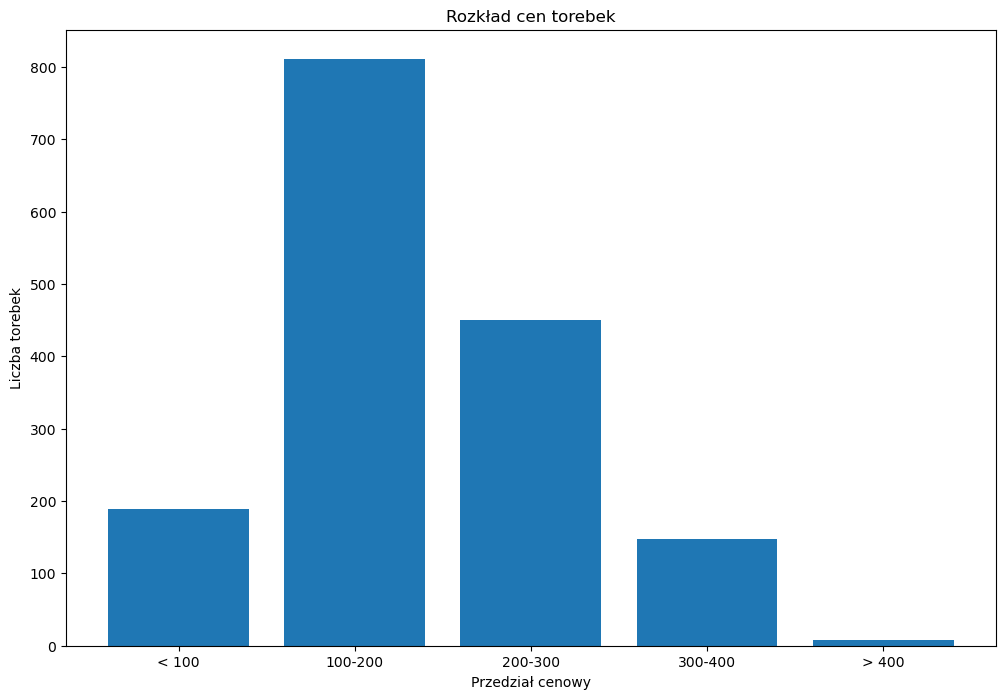

In [13]:
import json
import matplotlib.pyplot as plt
import statistics

with open("purses.json", 'r', encoding='utf-8') as f:
    purses = json.load(f)
for p in purses:
    p['price'] = float(p['price'])
    if p['name'] == None:
        continue
print(purses)

purses_sorted = sorted(purses, key=lambda purse: purse['price'])

cheapest_price = purses_sorted[0]
most_expensive_price = purses_sorted[-1]
mean_price = statistics.mean(purse['price'] for purse in purses)
closest = min(purses, key=lambda purse: abs(purse['price'] - mean_price))

print(f"Najtanszy: {cheapest_price['name']} {cheapest_price['price']}")
print(f"Najdrozsy: {most_expensive_price['name']} {most_expensive_price['price']}")
print(f"Najbliżej średniej: {closest['name']} {closest['price']}")

purses = {
    '< 100': len([p for p in purses if p['price'] < 100]),
    '100-200': len([p for p in purses if 100 <= p['price'] < 200]),
    '200-300': len([p for p in purses if 200 <= p['price'] < 300]),
    '300-400': len([p for p in purses if 300 <= p['price'] < 400]),
    '> 400': len([p for p in purses if p['price'] >= 400])
}

labels = purses.keys()
count = purses.values()

plt.figure(figsize = (12, 8))
plt.bar(labels, count)
plt.title("Rozkład cen torebek")
plt.xlabel("Przedział cenowy")
plt.ylabel("Liczba torebek")
plt.show()

